# Geometric Brownian Motion

The purpose of this notebook is to review and illustrate the  [Geometric Brownian motion](https://en.wikipedia.org/wiki/Geometric_Brownian_motion) and some of its main properties.

![image](_static/geometric_brownian_motion.png)

## Definition

The Geometric Brownian motion can be defined by the following Stochastic Differential Equation (SDE)

\begin{equation}
dX_t = \mu X_t dt + \sigma X_t dW_t, \quad t >0,
\end{equation}

with initial condition $X_0 =x_0>0$, and constant parameters $\mu\in \mathbb{R}$, $\sigma>0$. Here, $W_t$ denotes a standard Brownian motion. 

In order to find its solution, let us set $Y_t = \ln(X_t)$. Then, Ito's formula implies

$$Y_t = Y_0 +  \left( \mu-\frac{1}{2}\sigma^2 \right)t  + \sigma W_t,$$

or equivalently 

\begin{equation}
\ln(X_t) = \ln(x_0) +  \left( \mu-\frac{1}{2}\sigma^2 \right)t  + \sigma W_t.
\end{equation}

From this expression, we obtain

\begin{equation}
X_t = x_0 \exp \left\{  \left( \mu-\frac{1}{2}\sigma^2 \right)t  + \sigma W_t \right\}, \qquad t\geq 0.
\end{equation}

```{note}
📝 The last expression implies that the process takes only positive values.
```

## Marginal Distributions

Equation (3.2) implies that for each $t>0$, the variable $\ln (X_t)|X_0$, which will be denoted simply by $\ln(X_t)$, follows a normal distribution –since it can be expressed as a scaled marginal of the Brownian motion plus a deterministic part. 

Moreover, using the properties of the Brownian Motion we can calculate its expectation and variance, namely
\begin{equation*}
\mathbf{E} [\ln(X_t) ] =  E[\ln(X_t) | X_0]  = \log(x_0) +  \left( \mu-\frac{1}{2}\sigma^2 \right)t,
\end{equation*}
and
\begin{equation*}
 \mathbf{Var} [\ln(X_t) ] = Var [\ln(X_t) | X_0] = \sigma^2 t.
\end{equation*}
That is,
\begin{equation*}
\ln(X_t) \sim \mathcal{N}\left(\ln(x_0) +  \left( \mu-\frac{1}{2}\sigma^2 \right)t, \sigma^2 t\right ),
\end{equation*}
and consequently $X_t$ follows a [log-normal distribution](https://en.wikipedia.org/wiki/Log-normal_distribution). 



### Expectation and Variance

\begin{equation*}
\mathbf{E} [X_t] = \exp \left\{ \ln(x_0) +  \left( \mu-\frac{1}{2}\sigma^2 \right)t  + \frac{\sigma^2 t}{2}  \right\},
\end{equation*}
and
\begin{equation*}
\mathbf{Var} [X_t] =  \left[ \exp \left\{ \sigma^2 t  \right\} - 1  \right]\exp \left\{  2\left(\ln(x_0) +  \left( \mu-\frac{1}{2}\sigma^2 \right)t \right) + \sigma^2 t \right\}.
\end{equation*}

To calculate the expectation of $X_t$, we are going to use the fact that the process $M_t = \exp \{ \sigma W_t - \dfrac{1}{2}\sigma^2 t\}$ is an exponential martingale. Then
\begin{align*}
\mathbf{E} \left[X_t \right] &= \mathbf{E} \left[s_0\exp \left\{ (\mu  - \dfrac{1}{2}\sigma^2) t +   \sigma W_t \right\} \right]\\
&= x_0\exp \left\{ \mu t   \right\}  E\left[\exp \left\{  - \dfrac{1}{2}\sigma^2 t +  \sigma W_t \right\} \right]\\
&= x_0\exp \left\{ \mu t   \right\}.
\end{align*}

Similarly, for the variance we will use the fact that the process $M_t = \exp \left\{ 2\sigma W_t - 2\sigma^2 t \right\}$ is an exponential martingale. Then
\begin{align*}
\mathbf{E}\left[X_t^2 \right]
&=\mathbf{E}\left[x_0^2\exp \left\{  2\mu t- \sigma^2 t  +2\sigma W_t  \right\} \right] \\
& = x_0^2\exp \left\{2\mu t + \sigma^2 t  \right\}  \mathbf{E}\left[s_0^2\exp \left\{ 2\sigma W_t - 2\sigma^2 t \right\} \right] \\
& = x_0^2 \exp \left\{(2\mu + \sigma^2 ) t \right\}.
\end{align*}
Hence
\begin{align*}
\mathbf{Var} [ X_t] &= \mathbf{E}\left[X_t^2 \right] - \mathbf{E}\left[X_t \right]^2\\
& = x_0^2\exp \left\{(2\mu + \sigma^2 ) t \right\} - s_0^2\exp \left\{2\mu t \right\}\\
& = x_0^2\exp \left\{2\mu t \right\} \left(\exp \left\{\sigma^2 t \right\} - 1\right).
\end{align*}
So, for given $x_0, \mu, \sigma,$ and $t$, we can calculate both the expectation and the variance of $X_t|X_0$ using these formulas.

In [2]:
import numpy as np

x0 = 1.0
mu = 0.1
sigma = 0.2
t= 10
print(f'For x_0={x0}' , f'mu={mu}', f'sigma=.{sigma}', f't={t}', sep=", ")
print(f'E[X_t]={(x0*np.exp(mu*t)):.2f}', f'Var[S_t]={(x0**2)*np.exp(2*mu*t)*(np.exp(t*sigma**2)-1) :.2f}', sep="\n")

For x_0=1.0, mu=0.1, sigma=.0.2, t=10
E[X_t]=2.72
Var[S_t]=3.63


### Marginal Distributions in Python

Knowing the distribution –with its corresponding parameters– of the marginal distributions allows us to reproduce them with `Python`. 

One way to do this is by using the object  `lognorm`  from the library `scipy.stats`.  The next cell shows how to create $X_1$ using this method.

In [3]:
from scipy.stats import lognorm
import numpy as np 

mu = 1.0
sigma = 0.5
t =1.0 
x0 = 1.0 
X_1 = lognorm(s=sigma*np.sqrt(t), scale=np.exp(np.log(x0) + (mu - 0.5*sigma**2)*t))
print(X_1.mean())
print(X_1.var())

2.7182818284590455
2.098679737427875


Another way is by creating an object  `GBM` from `aleatory.processes` and calling the method `get_marginal` on it. The next cell shows how to create the marginal $X_1$ using this method.

In [4]:
from aleatory.processes import GBM

mu = 1.0
sigma = 0.5
t = 1.0
x0 = 1.0
process = GBM(drift=mu, volatility=sigma, initial=x0)
X_1 = process.get_marginal(t=1)
print(X_1.mean())
print(X_1.var())

2.7182818284590455
2.098679737427875


Hereafter, we will use the latter method to create marginal distributions from the Geometric Brownian Motion.

### Probability Density Functions

The probability density function of the marginal distribution $X_t$ is given by the following expression
\begin{equation*}
f(x, t) = {\displaystyle {\frac {1}{x\sigma  {\sqrt {2\pi t}}}}\ \exp \left\{-{\frac {\left[\ln \left(x\right)- \left( \log(x_0) +  \left( \mu-\frac{1}{2}\sigma^2 \right)t\right)  \right]^{2}}{2\sigma ^{2}t  }}\right\}}, \qquad x, t >0.
\end{equation*}


#### Visualisation
In order to visualise these functions, we are going to load the library `matplotlib` and set some formatting options.

In [5]:
import matplotlib.pyplot as plt

In [9]:
plt.style.use("seaborn-v0_8-whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)
%config InlineBackend.figure_format ='retina'

Now, let's consider a process `GBM(drift=1.0, volatility=0.5, initial=1.0)` and plot the density function of $X_1$.

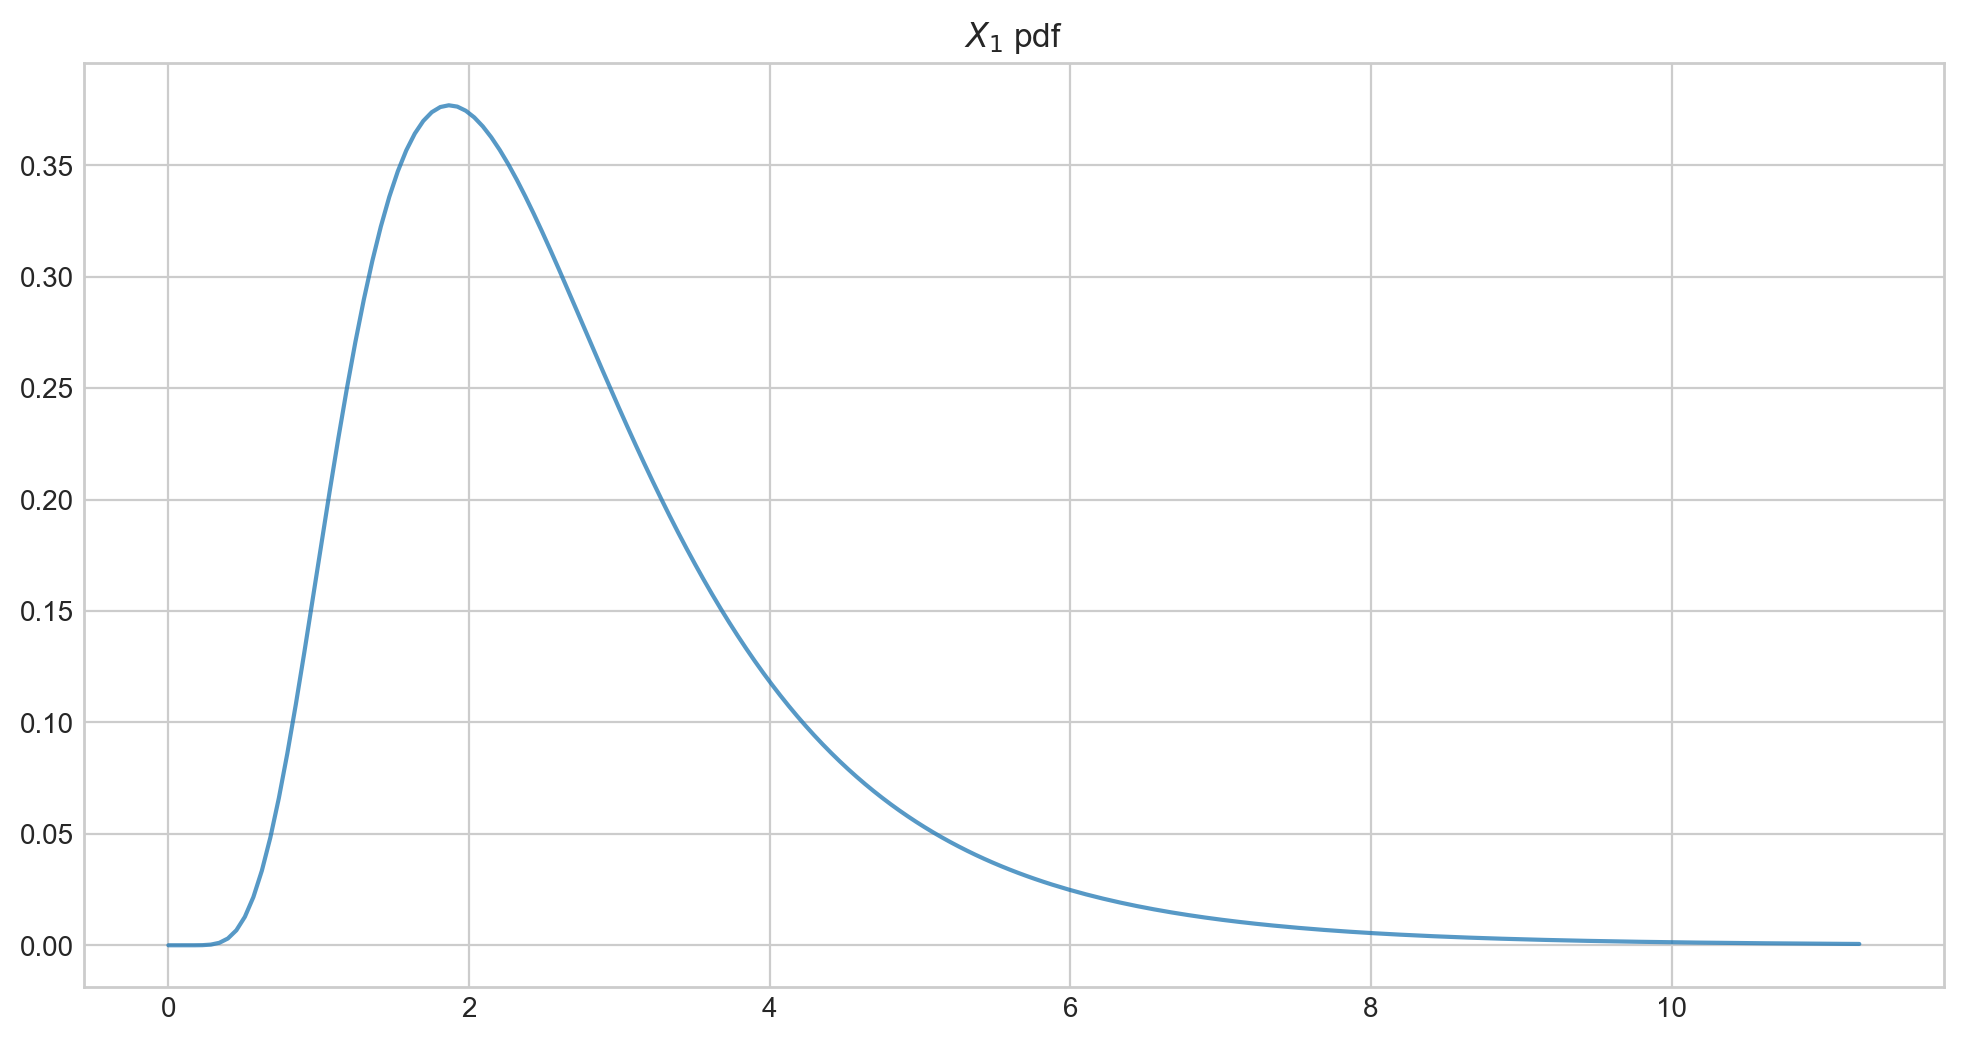

In [10]:
process = GBM(drift=1.0, volatility=0.5, initial=1.0)
X_1 = process.get_marginal(t=1)
x = np.linspace(0, X_1.ppf(0.999), 200)
plt.plot(x, X_1.pdf(x), '-', lw=1.5, alpha=0.75, label=f'$t$={1:.2f}')
plt.title(f'$X_1$ pdf')
plt.show()


Next, we vary the value of the parameter $\mu$ and plot the corresponding pdfs. As $\mu$ increases the density becomes wider and the shape changes as well. This reflects the fact that both the mean and the variance are increasing.

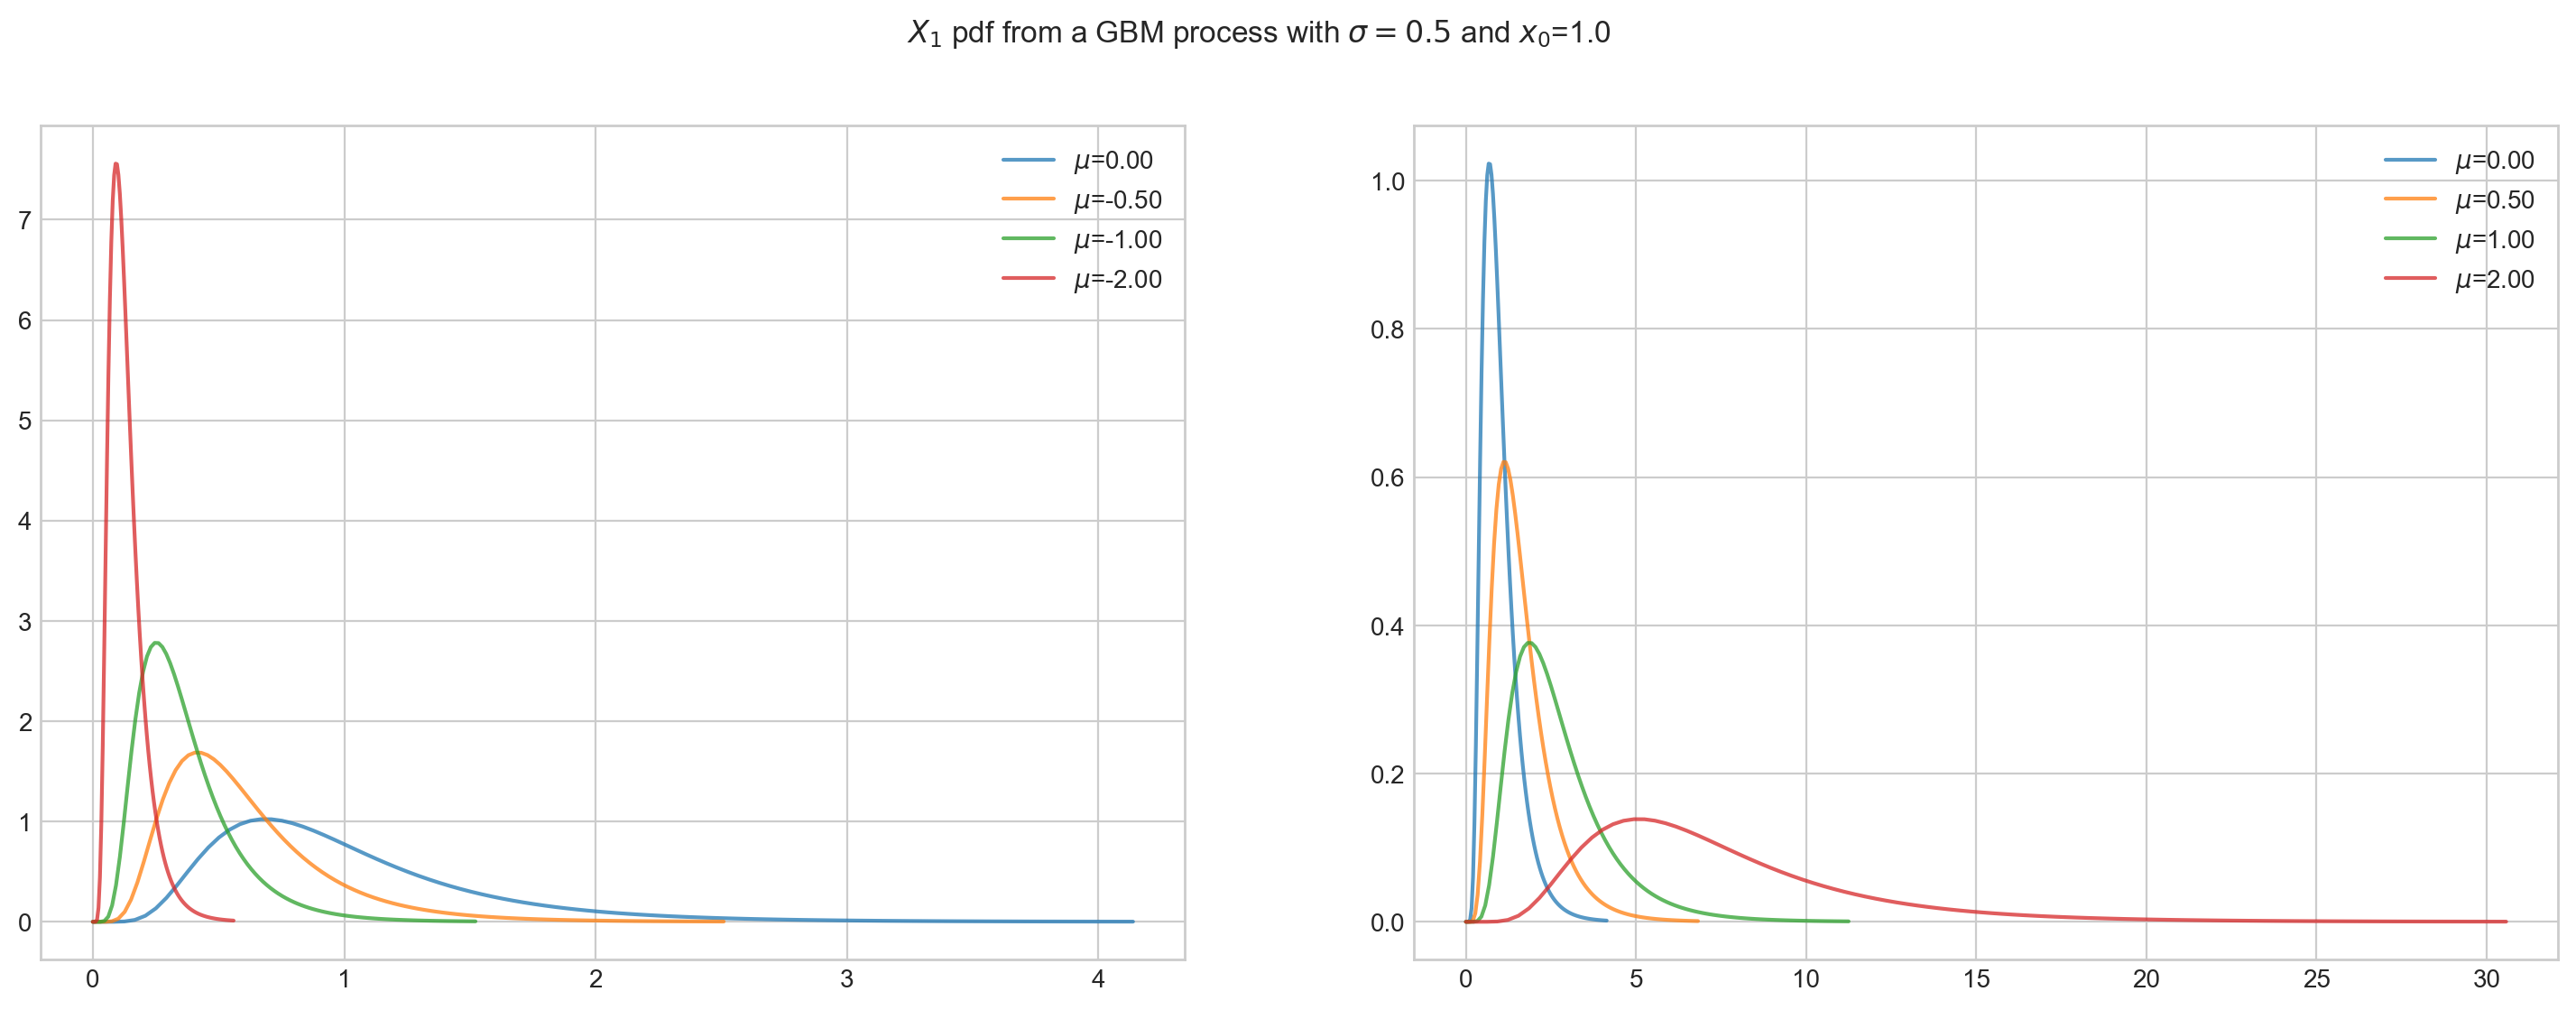

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(18, 6))
mu_values = ([0, -0.5, -1, -2],[0, 0.5, 1, 2])
for (mus, ax) in zip(mu_values, axs):
    for mu in mus:
        process = GBM(drift=mu, volatility=0.5, initial=1.0)
        X_t = process.get_marginal(t=1.0)
        x = np.linspace(0, X_t.ppf(0.999), 100)
        ax.plot(x, X_t.pdf(x), '-', lw=1.5,
                alpha=0.75, label=f'$\mu$={mu:.2f}')
        ax.legend()
fig.suptitle(f'$X_1$ pdf from a GBM process with $\sigma=0.5$ and $x_0$=1.0')
plt.show()


Now we keep $\mu$ fixed and vary $\sigma$. Once again, both the mean and the variance grow with $\sigma$.
Note that the variance grows at a very rapid rate, causing the density to be very wide.

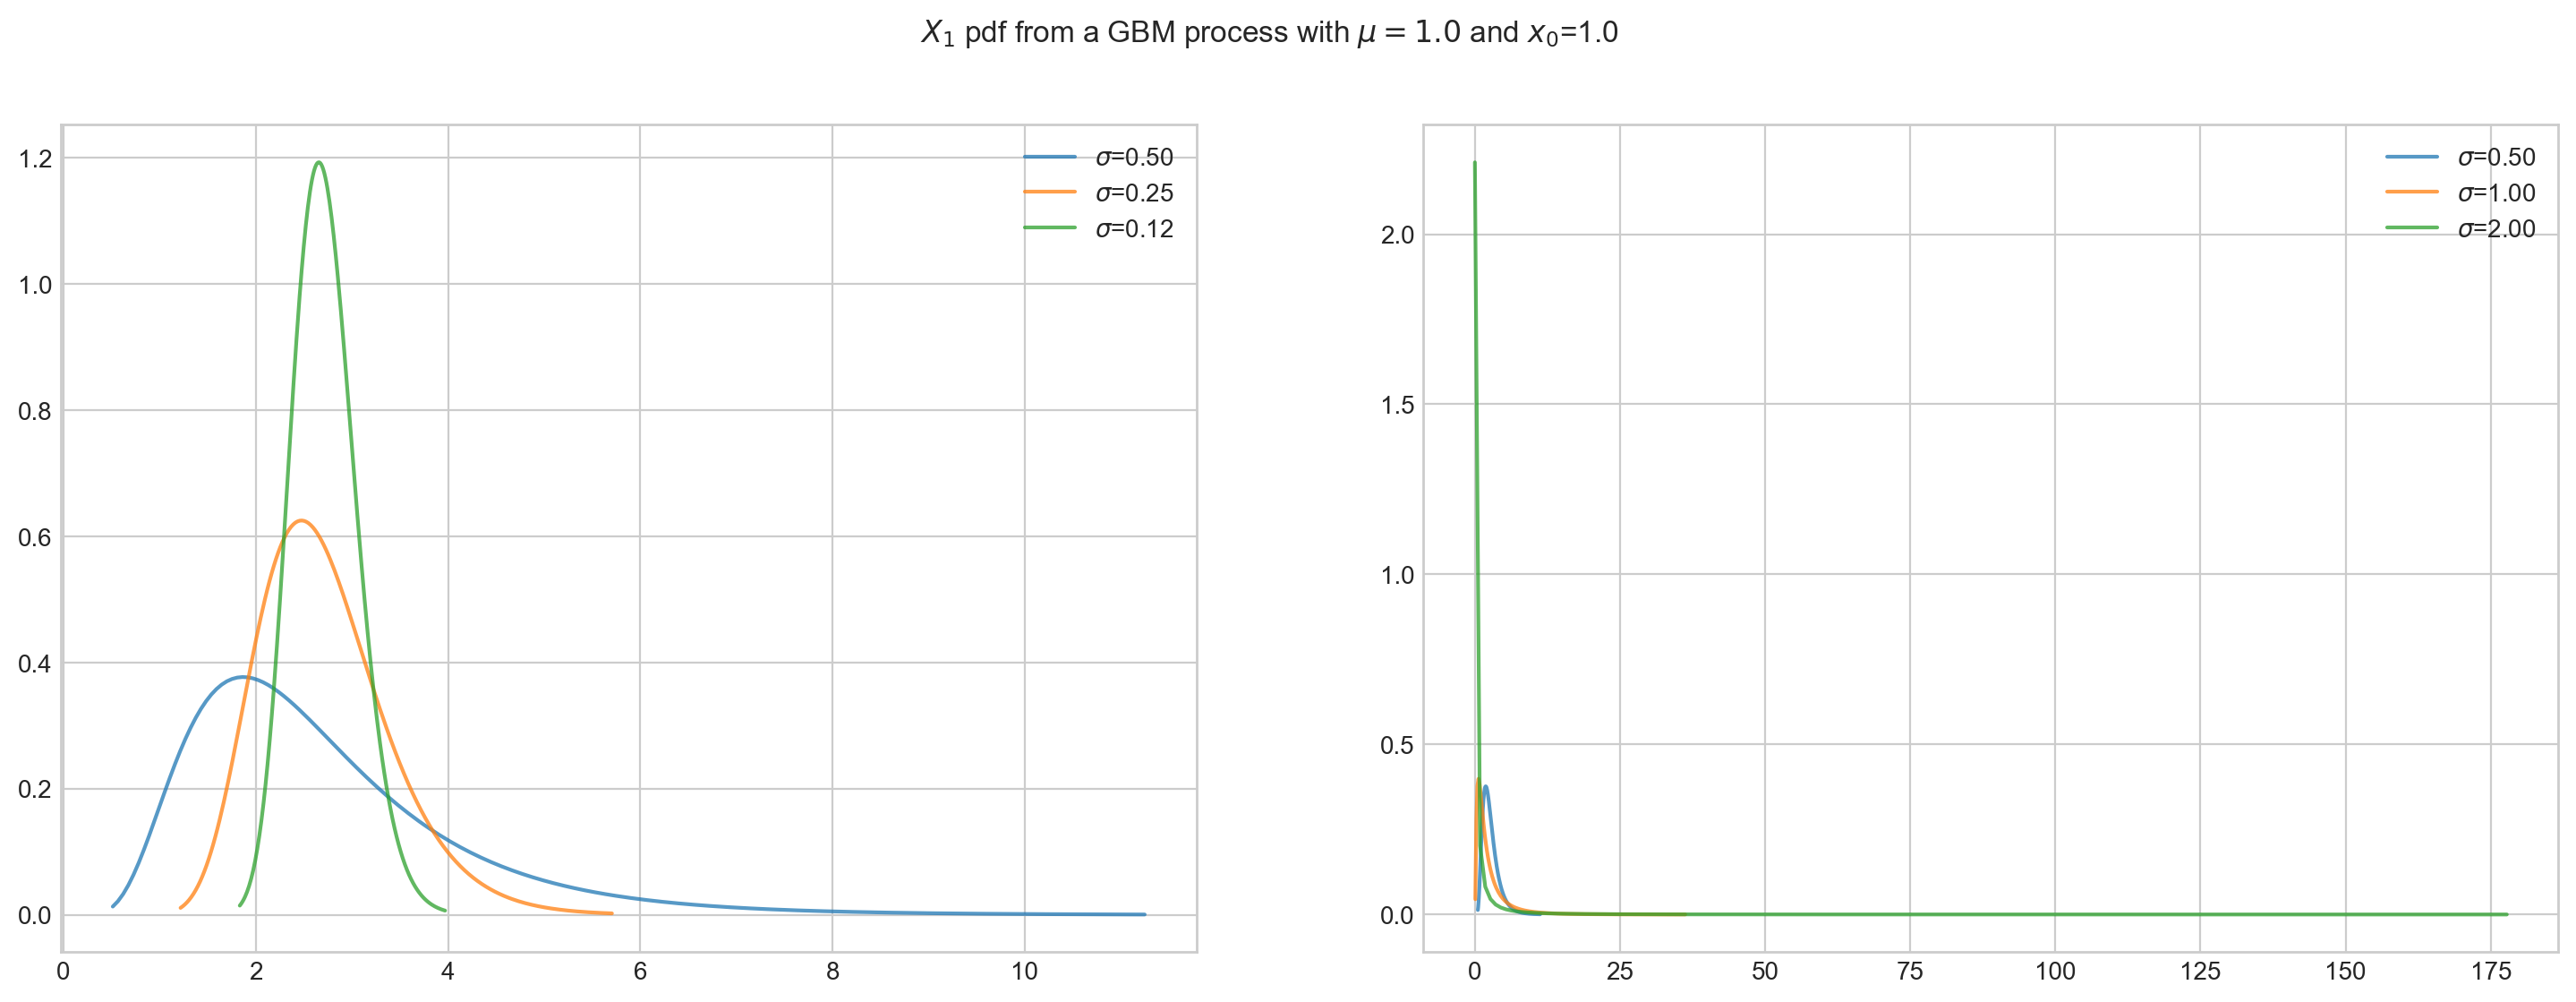

In [20]:
fig, axs = plt.subplots(1, 2, figsize=(18, 6))
sigma_values = ( [0.5,  0.25, 0.125], [0.5, 1, 2.0 ])
for (sigmas, ax) in zip(sigma_values, axs):
    for sigma in sigmas:
        process = GBM(drift=1.0, volatility=sigma, initial=1.0)
        X_t = process.get_marginal(t=1.0)
        x = np.linspace(X_t.ppf(0.001), X_t.ppf(0.999), 200)
        ax.plot(x, X_t.pdf(x), '-', lw=1.5,
                alpha=0.75, label=f'$\sigma$={sigma:.2f}')
        ax.legend()
fig.suptitle(f'$X_1$ pdf from a GBM process with $\mu=1.0$ and $x_0$=1.0')
plt.show()


Finally, let's fix both parameters and plot the densities $X_t$ as $t$ grows, i.e. as the process evolves in time.

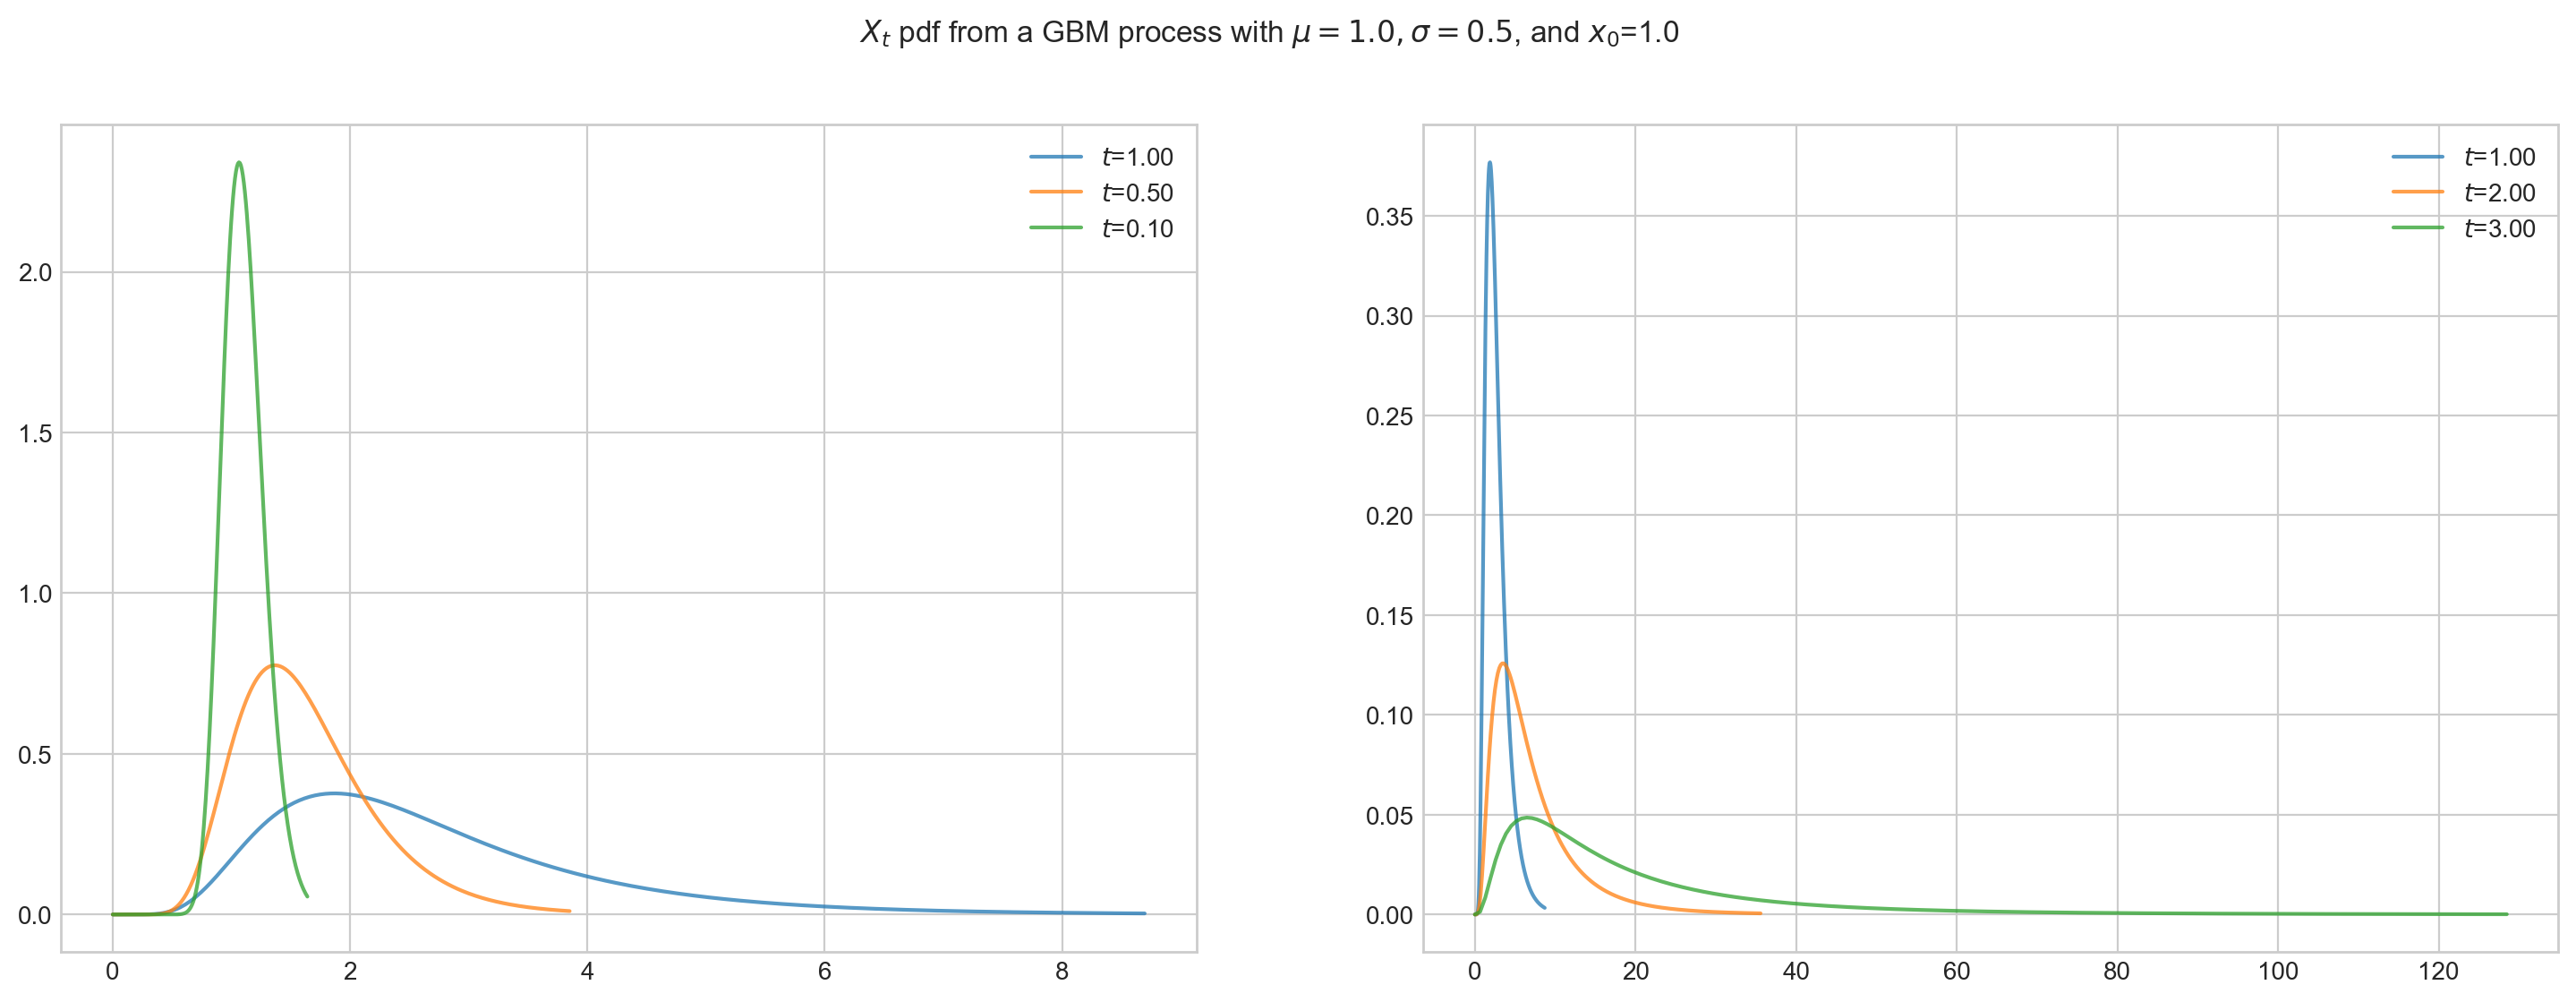

In [21]:
process = GBM(drift=1.0, volatility=0.5, initial=1.0)
fig, axs = plt.subplots(1, 2, figsize=(18, 6))
t_values = ([1.0, 0.5, 0.1], [1, 2, 3])
for (ts, ax) in zip(t_values, axs):
    for t in ts:
        X_t = process.get_marginal(t=t)
        x = np.linspace(0, X_t.ppf(0.995), 200)
        ax.plot(x, X_t.pdf(x), '-', lw=1.5,
                alpha=0.75, label=f'$t$={t:.2f}')
        ax.legend()
fig.suptitle(f'$X_t$ pdf from a GBM process with $\mu=1.0, \sigma=0.5$, and $x_0$=1.0')
plt.show()


### Sampling

Now, let's see how to get a random sample from $X_t$ for any  $t>0$. 

The next cell shows how to get a sample of size 5 from $X_1$.

In [12]:
from aleatory.processes import GBM

process = GBM(drift=1.0, volatility=0.5, initial=1.0)
X_1= process.get_marginal(t=1.0)
X_1.rvs(size=5)

array([0.91960828, 2.18523296, 1.51398961, 4.74143153, 3.21651072])

Similarly, we can get a sample from $X_{10}$

In [79]:
X_10 = process.get_marginal(t=10)
X_10.rvs(size=5)

array([ 1031.61005105,   172.85983188,   582.69621214, 70884.81425713,
        5007.98733501])

## Simulation


In order to simulate paths from a stochastic process, we need to set a discrete partition over an interval for the simulation to take place. 

For simplicity, we are going to consider an equidistant partition of size $n$ over $[0,T]$, i.e.:
\begin{equation*}
t_i = \frac{i}{n-1} T \qquad  \hbox{for } i = 0, \cdots, n-1.
\end{equation*}
Then, the goal is to simulate a path of the form $\{ X_{t_i} , i=0,\cdots, n-1\}$. 

There are a number of ways to do this. Here, we are going to use equation (3.3), i.e.
\begin{equation*}
X_t = x_0 \exp \left\{  \left( \mu-\frac{1}{2}\sigma^2 \right)t  + \sigma W_t \right\}, 
\end{equation*}
and the fact that we know how to simulate a Brownian Motion (see [Brownian Motion](https://quantgirluk.github.io/Understanding-Quantitative-Finance/brownian_motion.html) for details).

In [22]:
from aleatory.processes import BrownianMotion
T = 1.0
n = 100
x0 = 1.0 
mu = 1.0
sigma = 0.25
t = 1.0
times = np.linspace(0, T, n)  # Partition
BM = BrownianMotion(T=T) # Brownian Motion
bm_path = BM.sample_at(times) # Simulation from BM
gbm_path = x0*np.exp((mu - 0.5*sigma**2)*t + sigma*bm_path) # Equation (3.3)

Let's plot our simulated path!

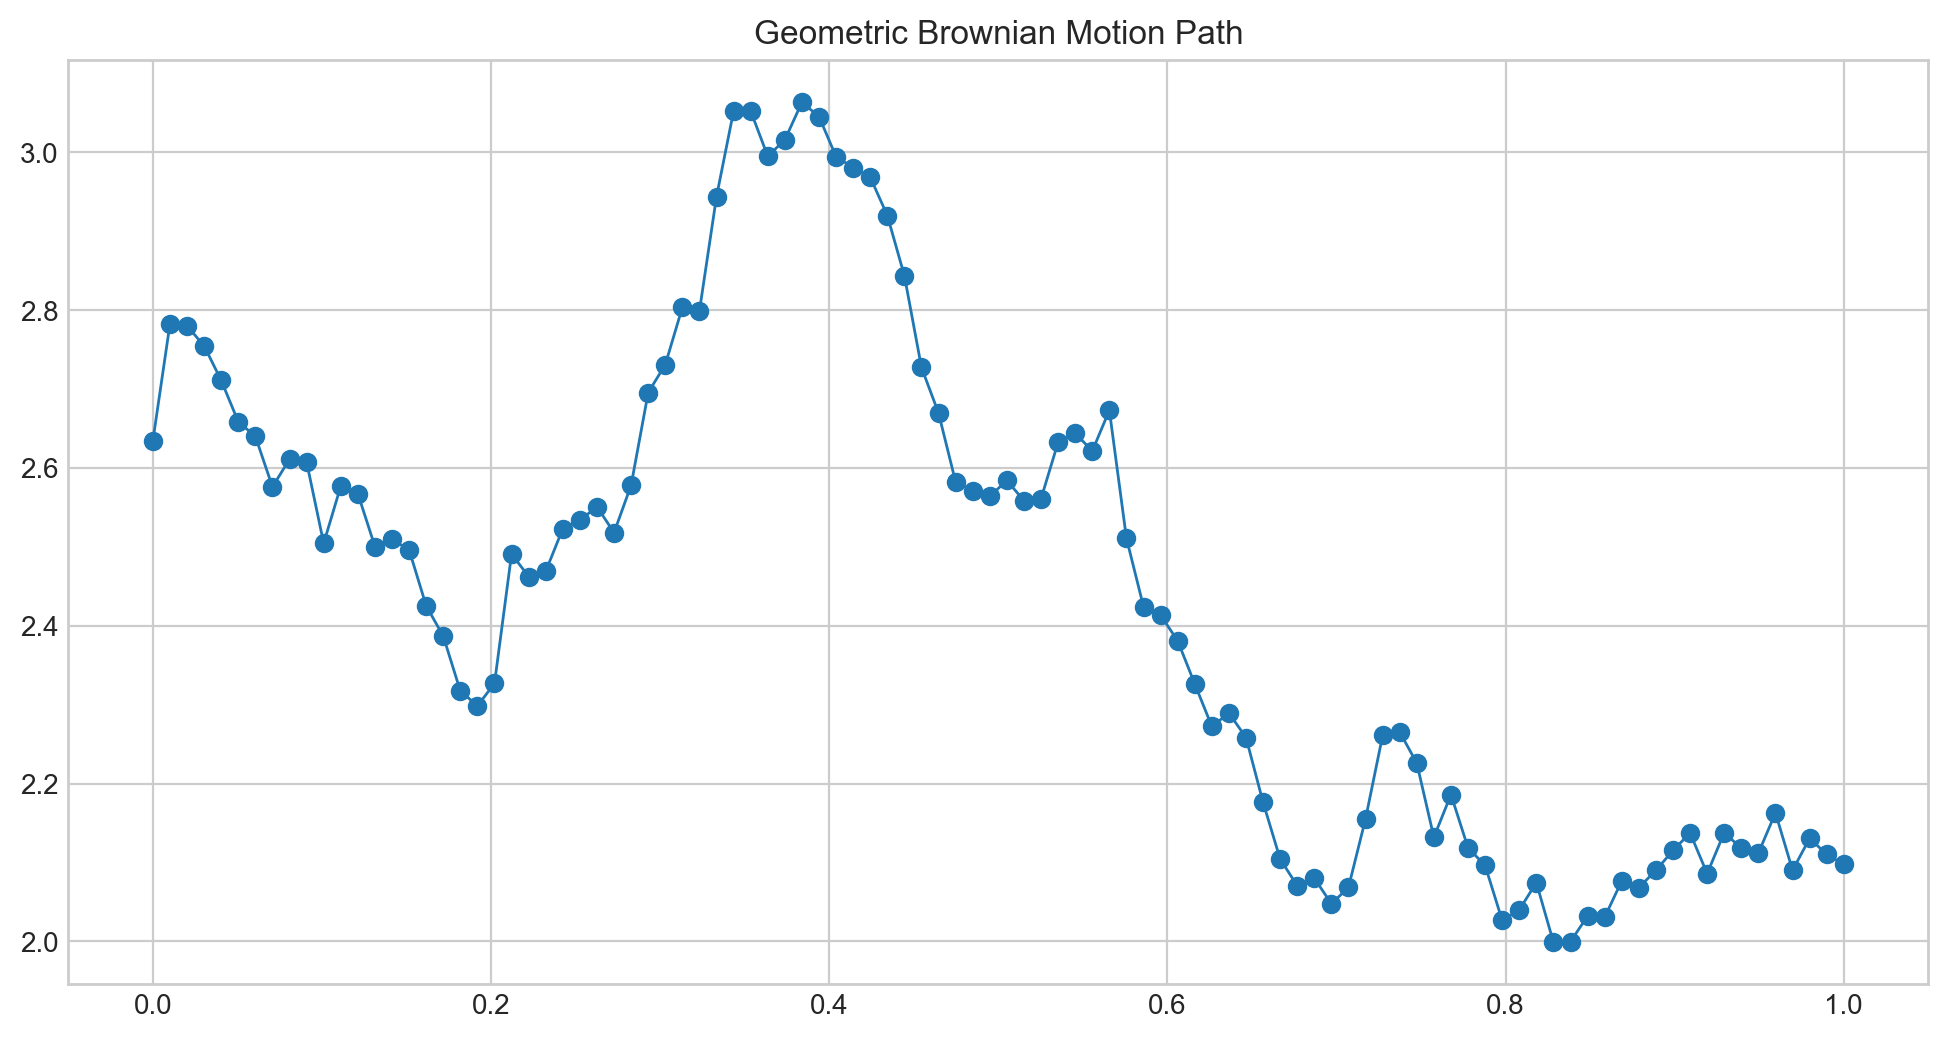

In [81]:
plt.plot(times, gbm_path, 'o-', lw=1)
plt.title('Geometric Brownian Motion Path')
plt.show()

```{note}
In this plot, we are using a linear interpolation to draw the lines between the simulated points. 
```

### Simulating and Visualising Paths

To simulate several paths from a GBM and visualise them we can use the method `plot` from the `aleatory` library. 


Let's simulate 10 paths over the interval $[0,1]$ using a partition of 100 points. 



`````{admonition} Tip
:class: tip
Remember that  the number of points in the partition is defined by the parameter $n$, while  the number of paths is determined by $N$.
`````

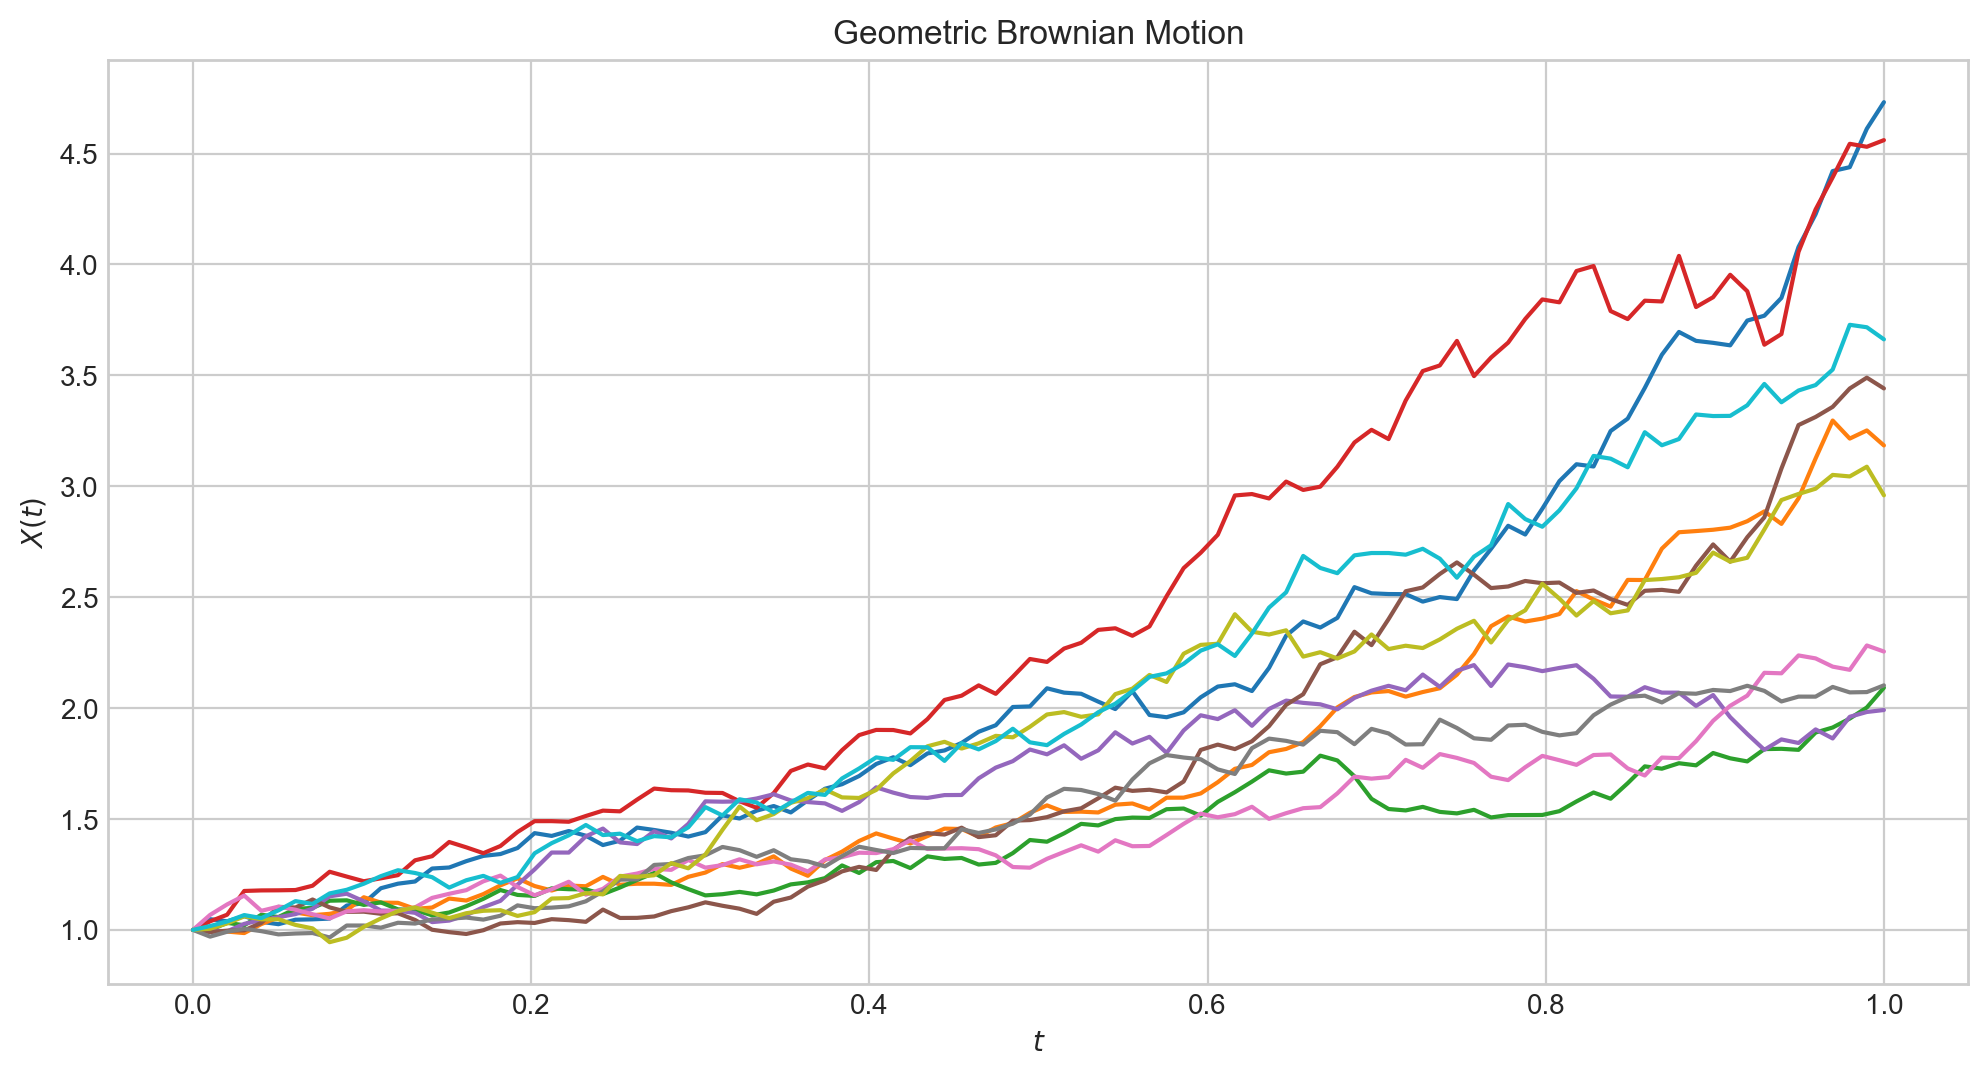

In [82]:
from aleatory.processes import GBM

process = GBM(drift=mu, volatility=sigma, initial=x0, T=1.0)
process.plot(n=100, N=10)
plt.show()

Similarly, we can define the GBM over the interval $[0, 5]$ and simulate 50 paths with a partition of size 100.

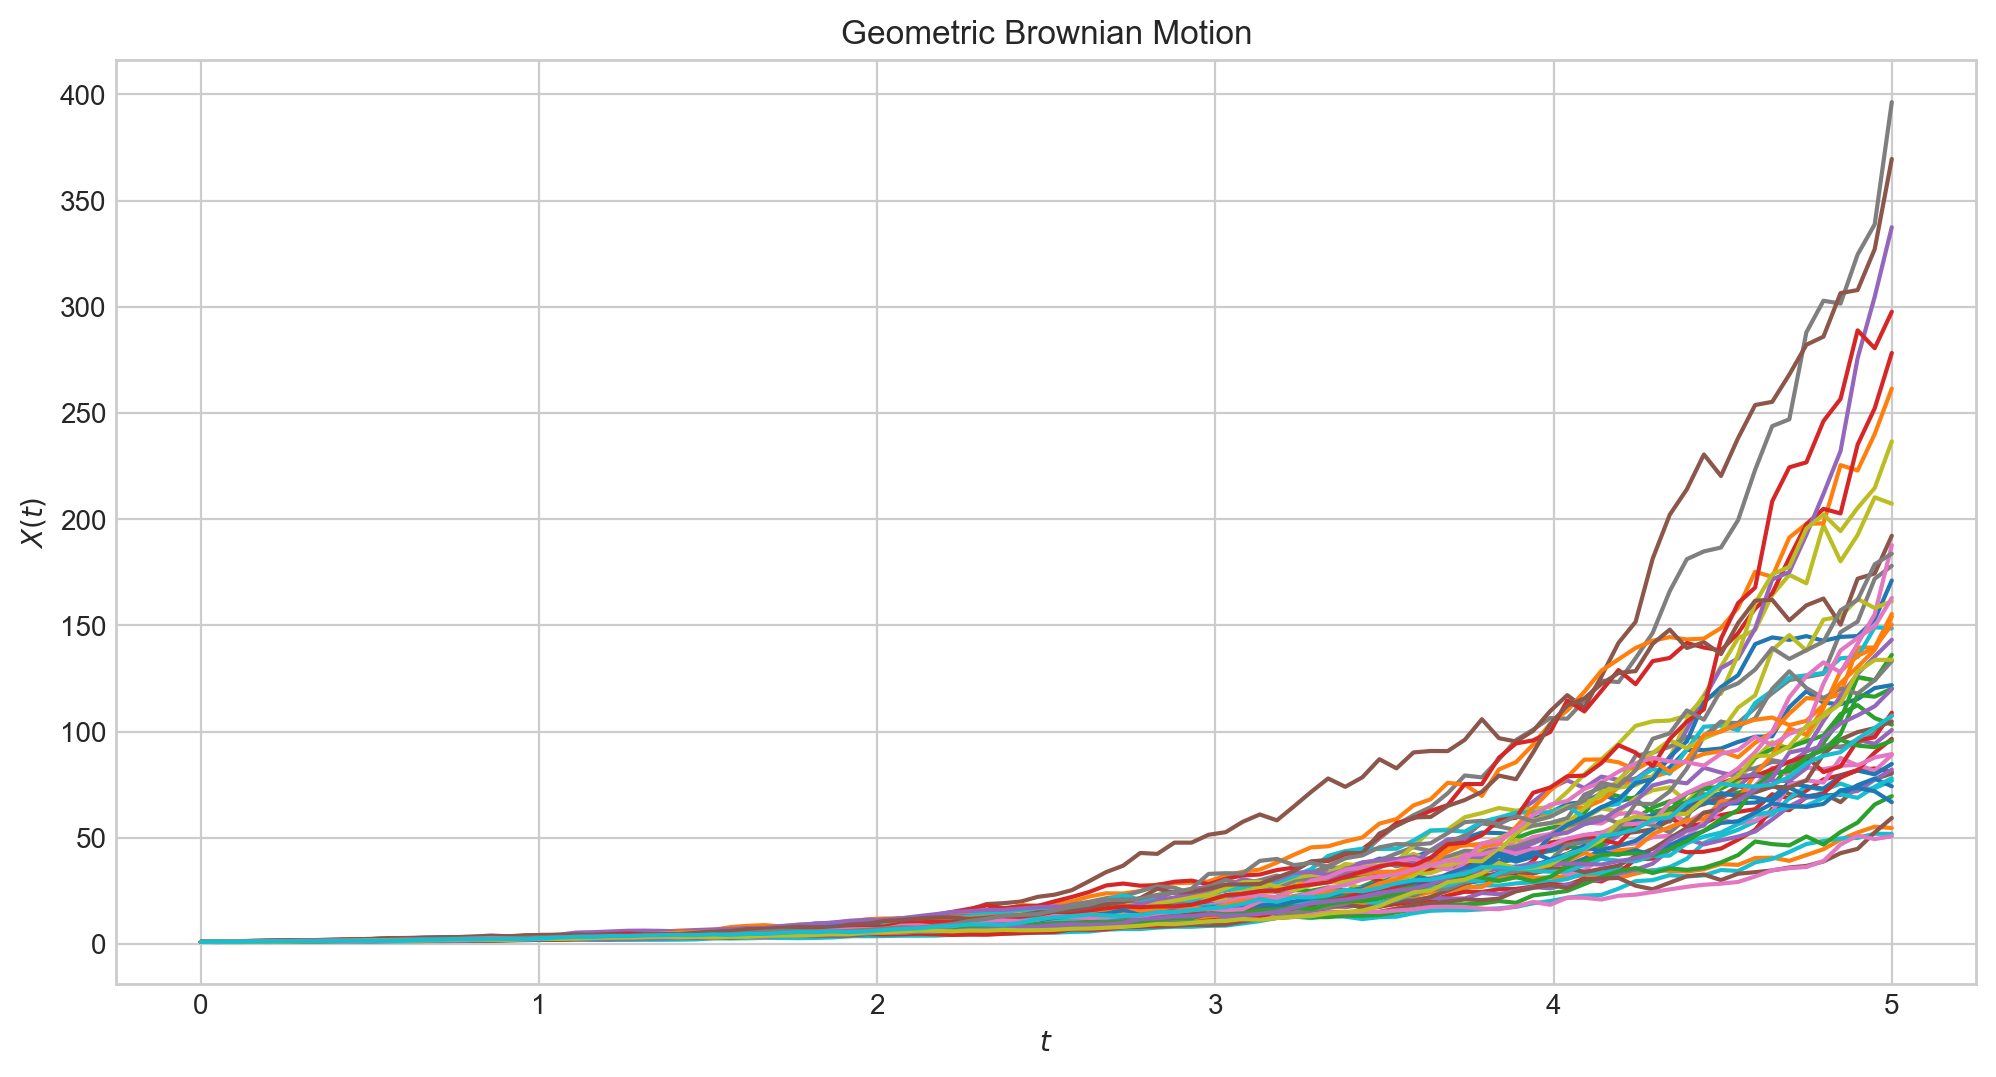

In [83]:
process = GBM(drift=mu, volatility=sigma, initial=x0, T=5.0)
process.plot(n=100, N=50)
plt.show()


## Long Time Behaviour 

### Expectation and Variance

Note that when $t$ goes to infinity, we have

\begin{equation*}
\lim_{t\rightarrow\infty} \mathbf{E}\left[X_t \right] = \lim_{t\rightarrow\infty} x_0\exp \left\{ \mu t   \right\} = 
\begin{cases}
\infty, \hbox{  if  } \mu>0\\
x_0, \hbox{  if  }  \mu=0\\
0, \hbox{  if  }  \mu<0, \\
\end{cases}
\end{equation*}
and
\begin{equation*}
\lim_{t\rightarrow\infty}\mathbf{Var}[ X_t] = \lim_{t\rightarrow\infty} x_0^2\exp \left\{2\mu t \right\} \left(\exp \left\{\sigma^2 t \right\} - 1\right) = 
\begin{cases}
\infty, \hbox{  if  } 2\mu+\sigma^2 >0\\
x_0^2, \hbox{  if  }  2\mu+\sigma^2=0.\\
0, \hbox{  if  }  2\mu+\sigma^2<0.\\
\end{cases}
\end{equation*}

In [84]:
def draw_mean_variance(x0, mu, sigma, T=100):

    process = GBM(drift=mu, volatility=sigma, initial=x0, T=T)
    ts = np.linspace(0, T, T)
    means = process.marginal_expectation(ts)
    variances = process.marginal_variance(ts)
    fig, (ax1, ax2,) = plt.subplots(1, 2, figsize=(9, 4))
    
    ax1.plot(ts, means, lw=1.5, color='black', label='$E[X_t]$')
    ax1.set_xlabel('t')
    ax1.legend()
    ax2.plot(ts,  variances, lw=1.5, color='red', label='$Var[X_t]$')
    ax2.set_xlabel('t')
    ax2.legend()
    fig.suptitle(
        'Expectation and Variance of $X_t$ with ' f'$x0$={x0:.2f}, $\mu$={mu:.2f}, $\sigma$={sigma:.2f}', size=12)
    plt.show()


#### Case 1. GBM with $\mu>0$ and $2\mu + \sigma^2>0$.

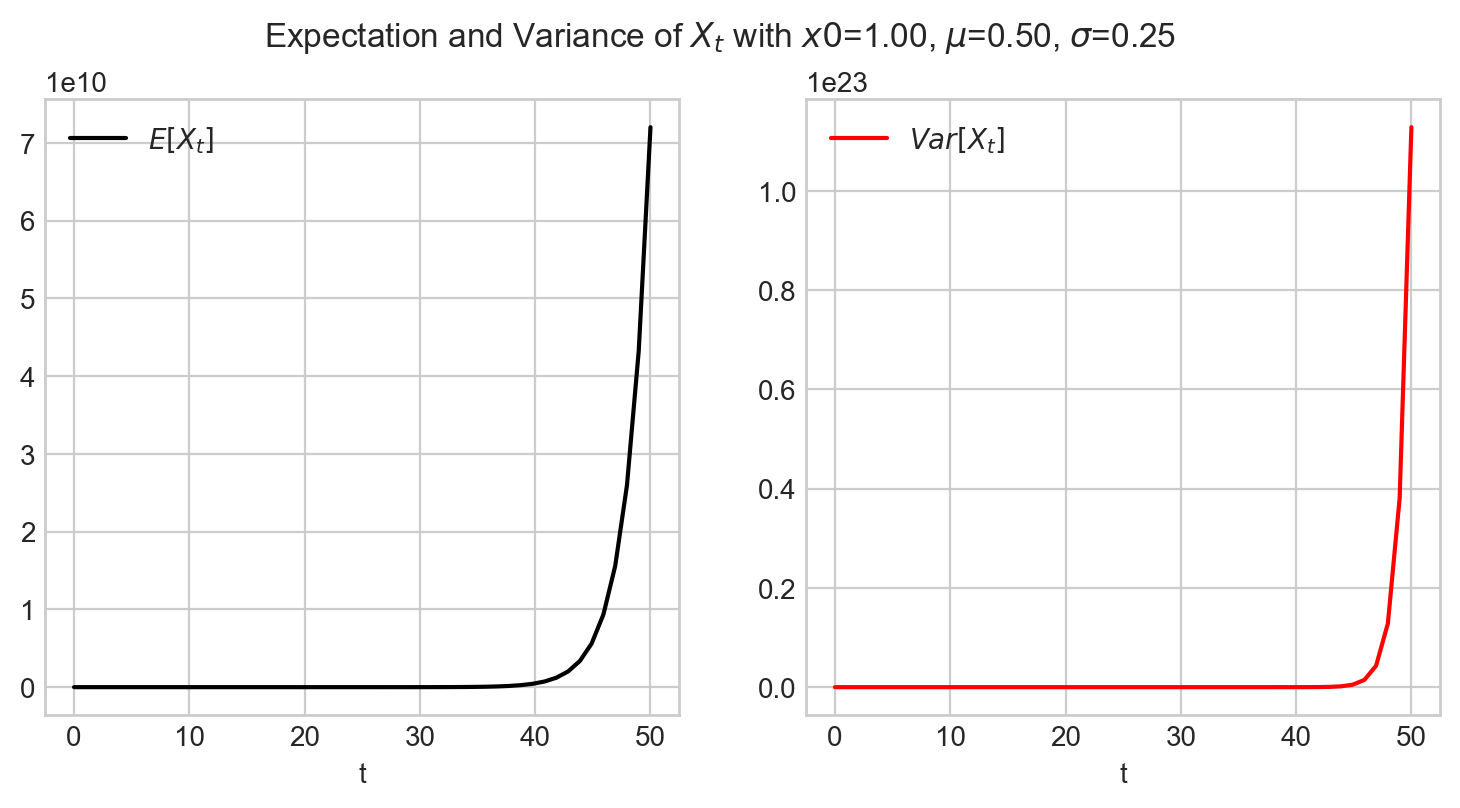

In [85]:
draw_mean_variance(x0= 1.0, mu=0.5, sigma=0.25, T=50)

#### Case 2. GBM with $\mu<0$ and $2\mu + \sigma^2>0$.

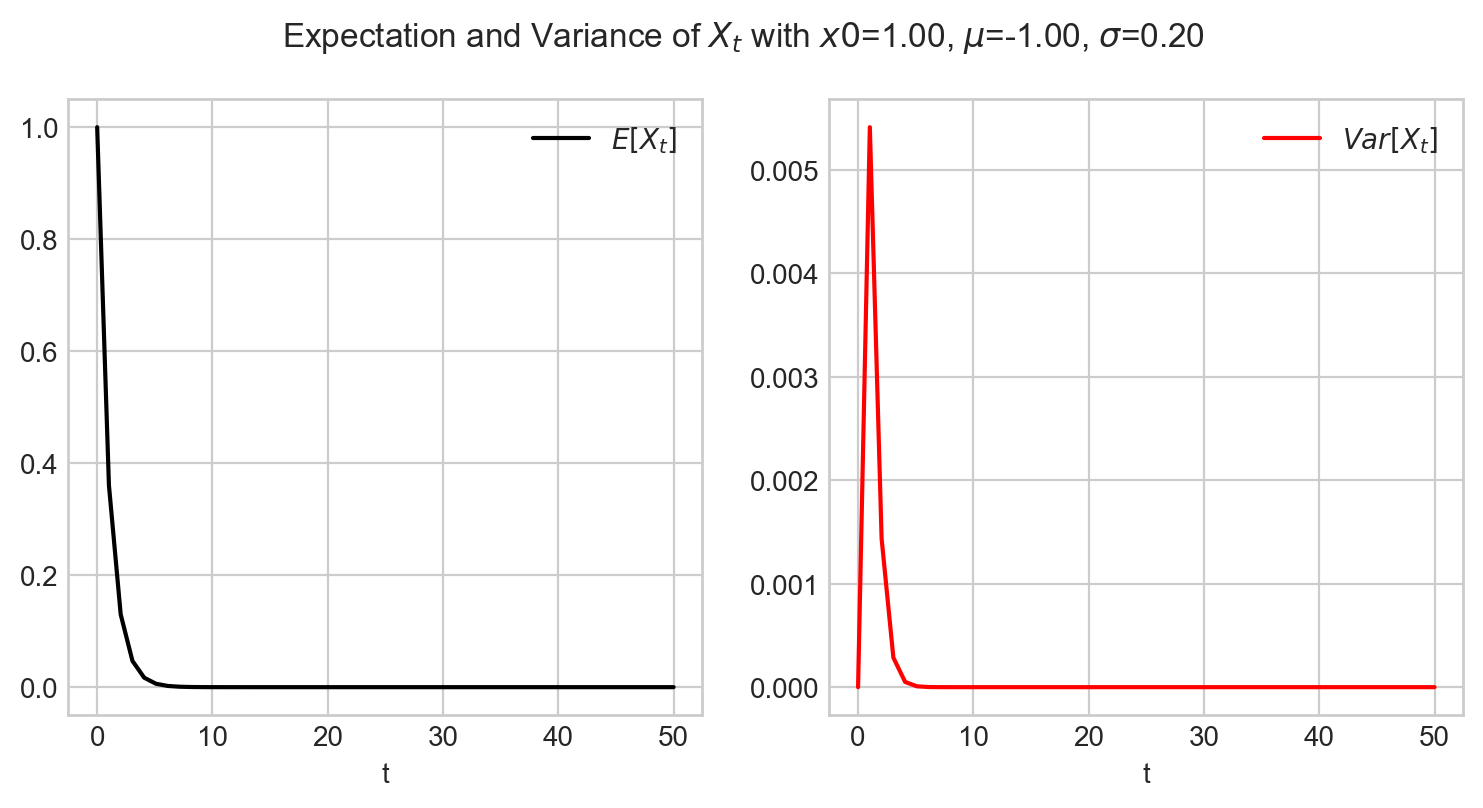

In [86]:
draw_mean_variance(x0=1.0, mu=-1.0, sigma=0.2, T=50)

#### Case 3. GBM with $\mu<0$ and $2\mu + \sigma^2=0$.

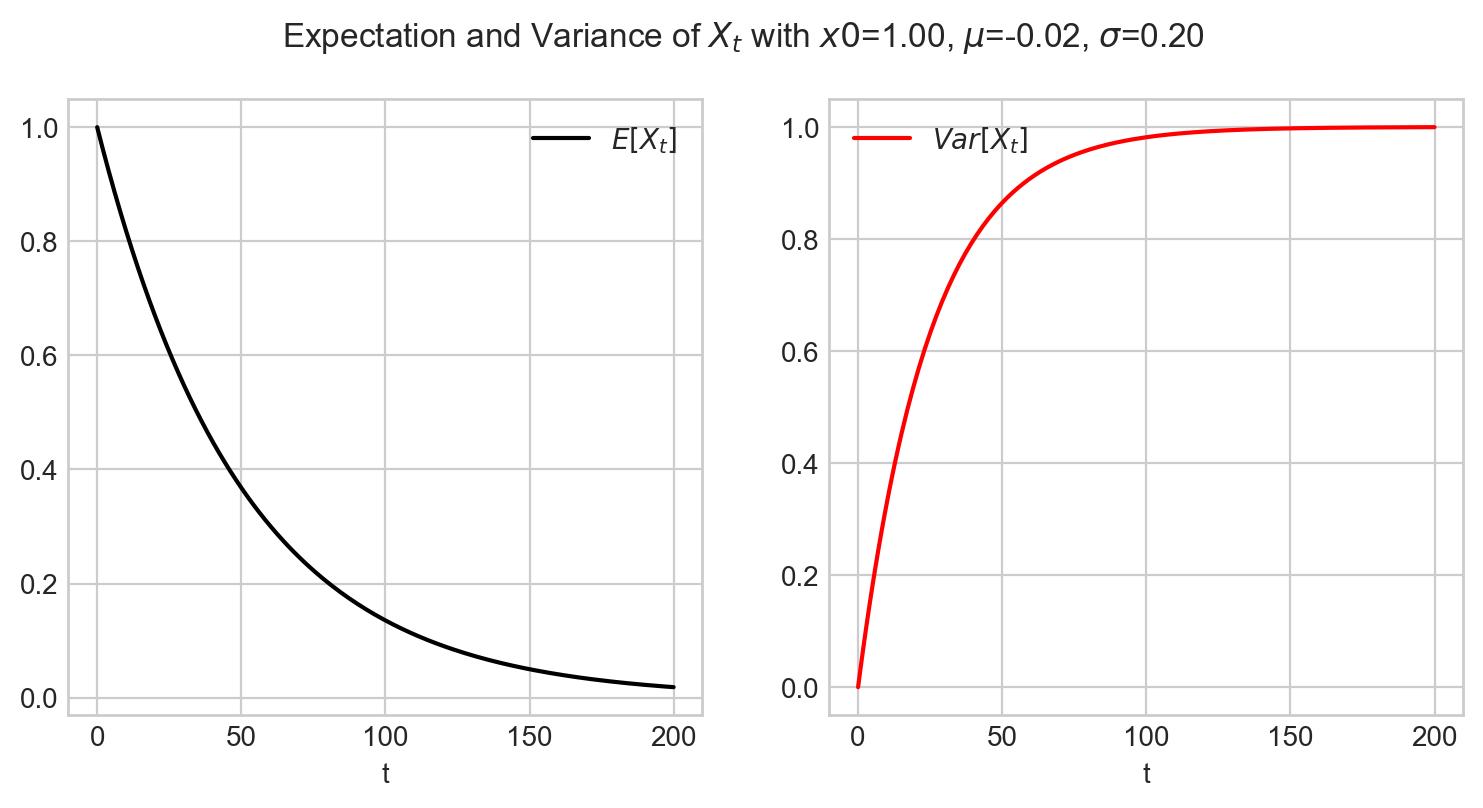

In [87]:
draw_mean_variance(x0=1.0, mu=-(0.2**2)/2, sigma=0.2, T=200)


#### Case 4. GBM with $\mu<0$ and $2\mu + \sigma^2 < 0$.

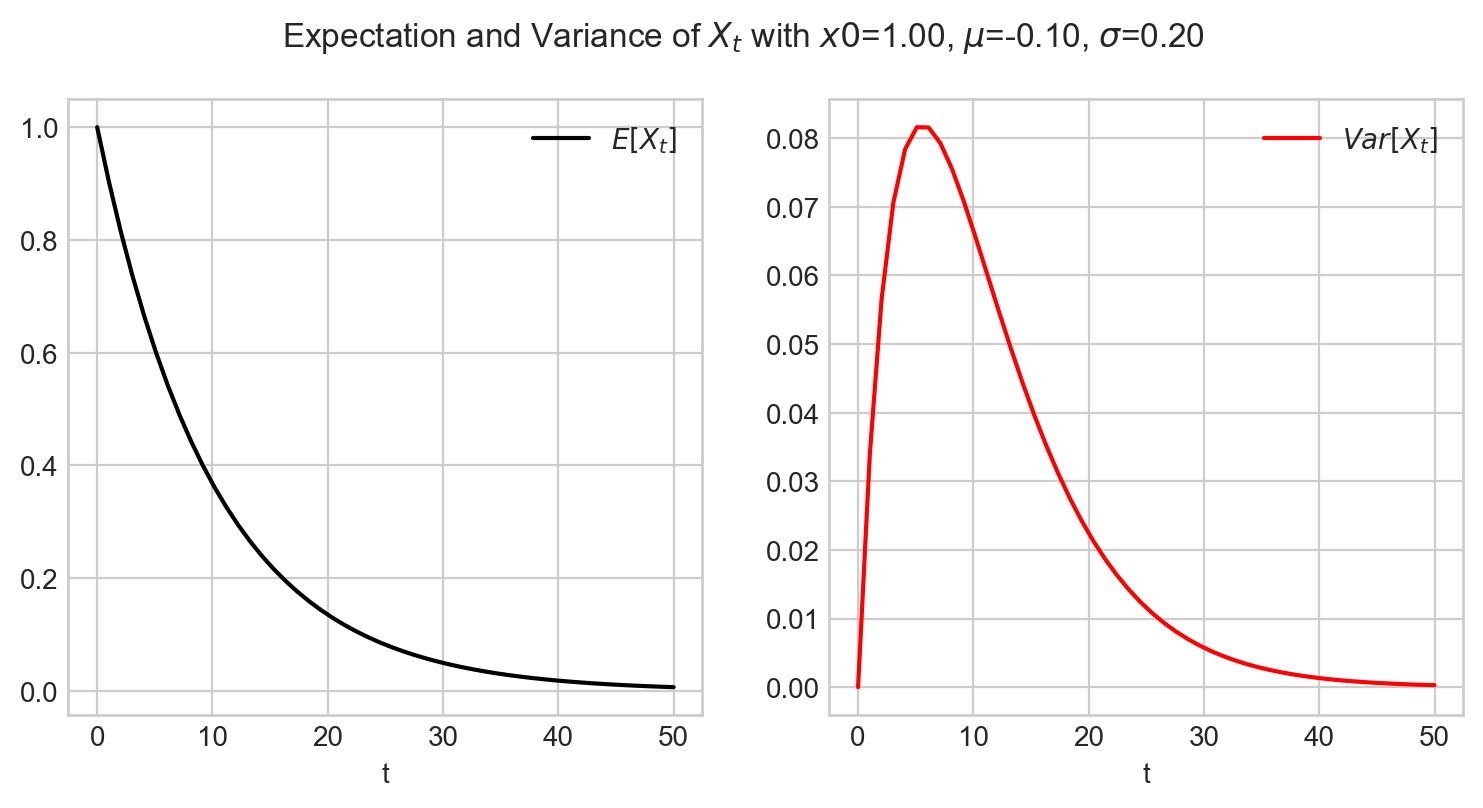

In [88]:
draw_mean_variance(x0=1.0, mu=-0.1, sigma=0.2, T=50)


#### Case 5. GBM with $\mu =0 $

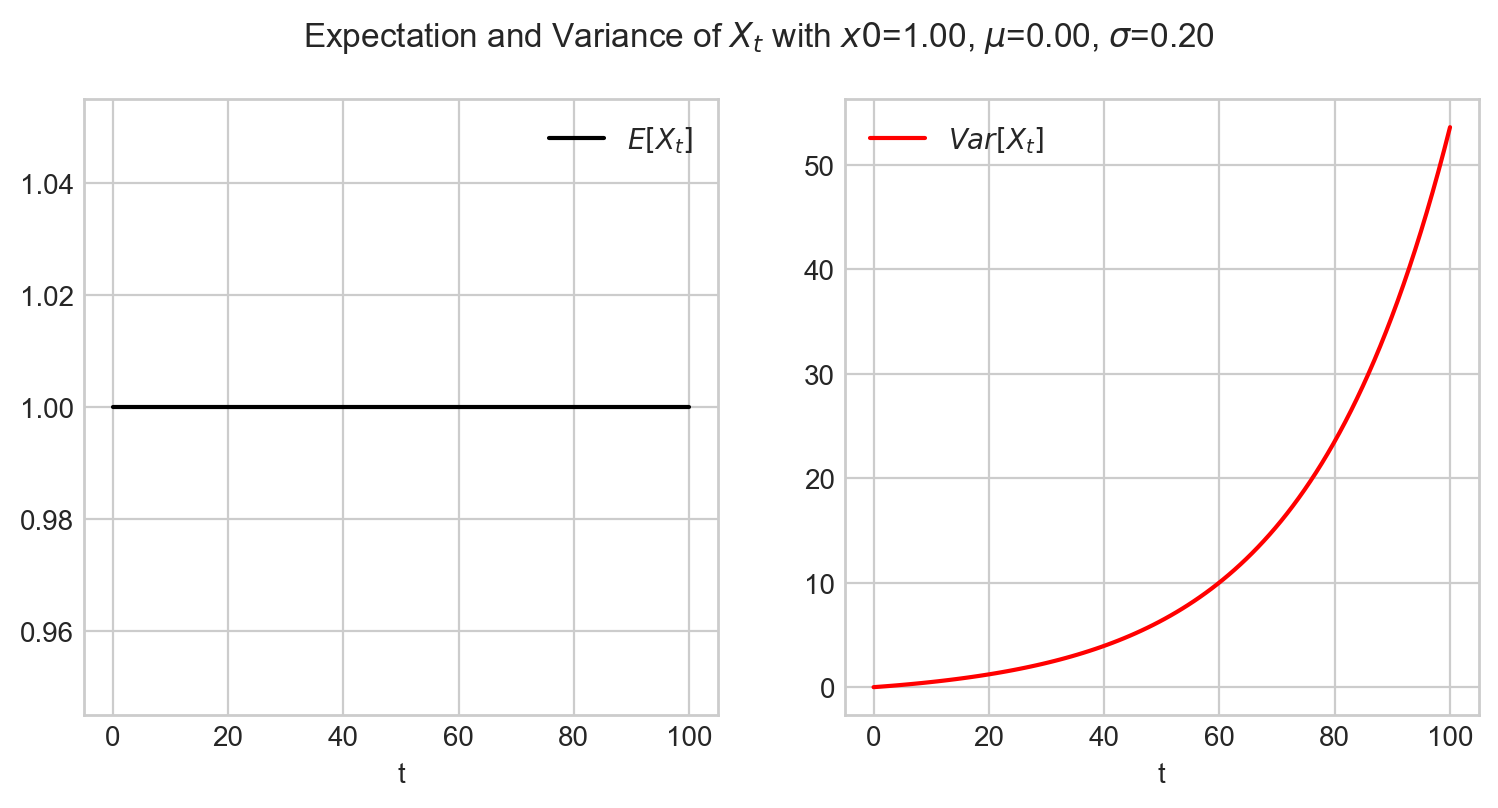

In [89]:
draw_mean_variance(x0=1.0, mu=0.0, sigma=0.2, T=100)

### Marginal
- If $ \mu>\frac{1}{2}\sigma^2$, then $X_t\rightarrow\infty$ in probability as $t\rightarrow\infty$. 

- If $ \mu<\frac{1}{2}\sigma^2$, then $X_t\rightarrow 0$ in probability as $t\rightarrow\infty$. 

- If $ \mu = \frac{1}{2}\sigma^2$, then $X_t$ has no limit in probability as $t\rightarrow\infty$. 


#### Case 1

If $\mu > \frac{1}{2}\sigma^2$, then $X_t\rightarrow\infty$ in probability as $t\rightarrow\infty$.

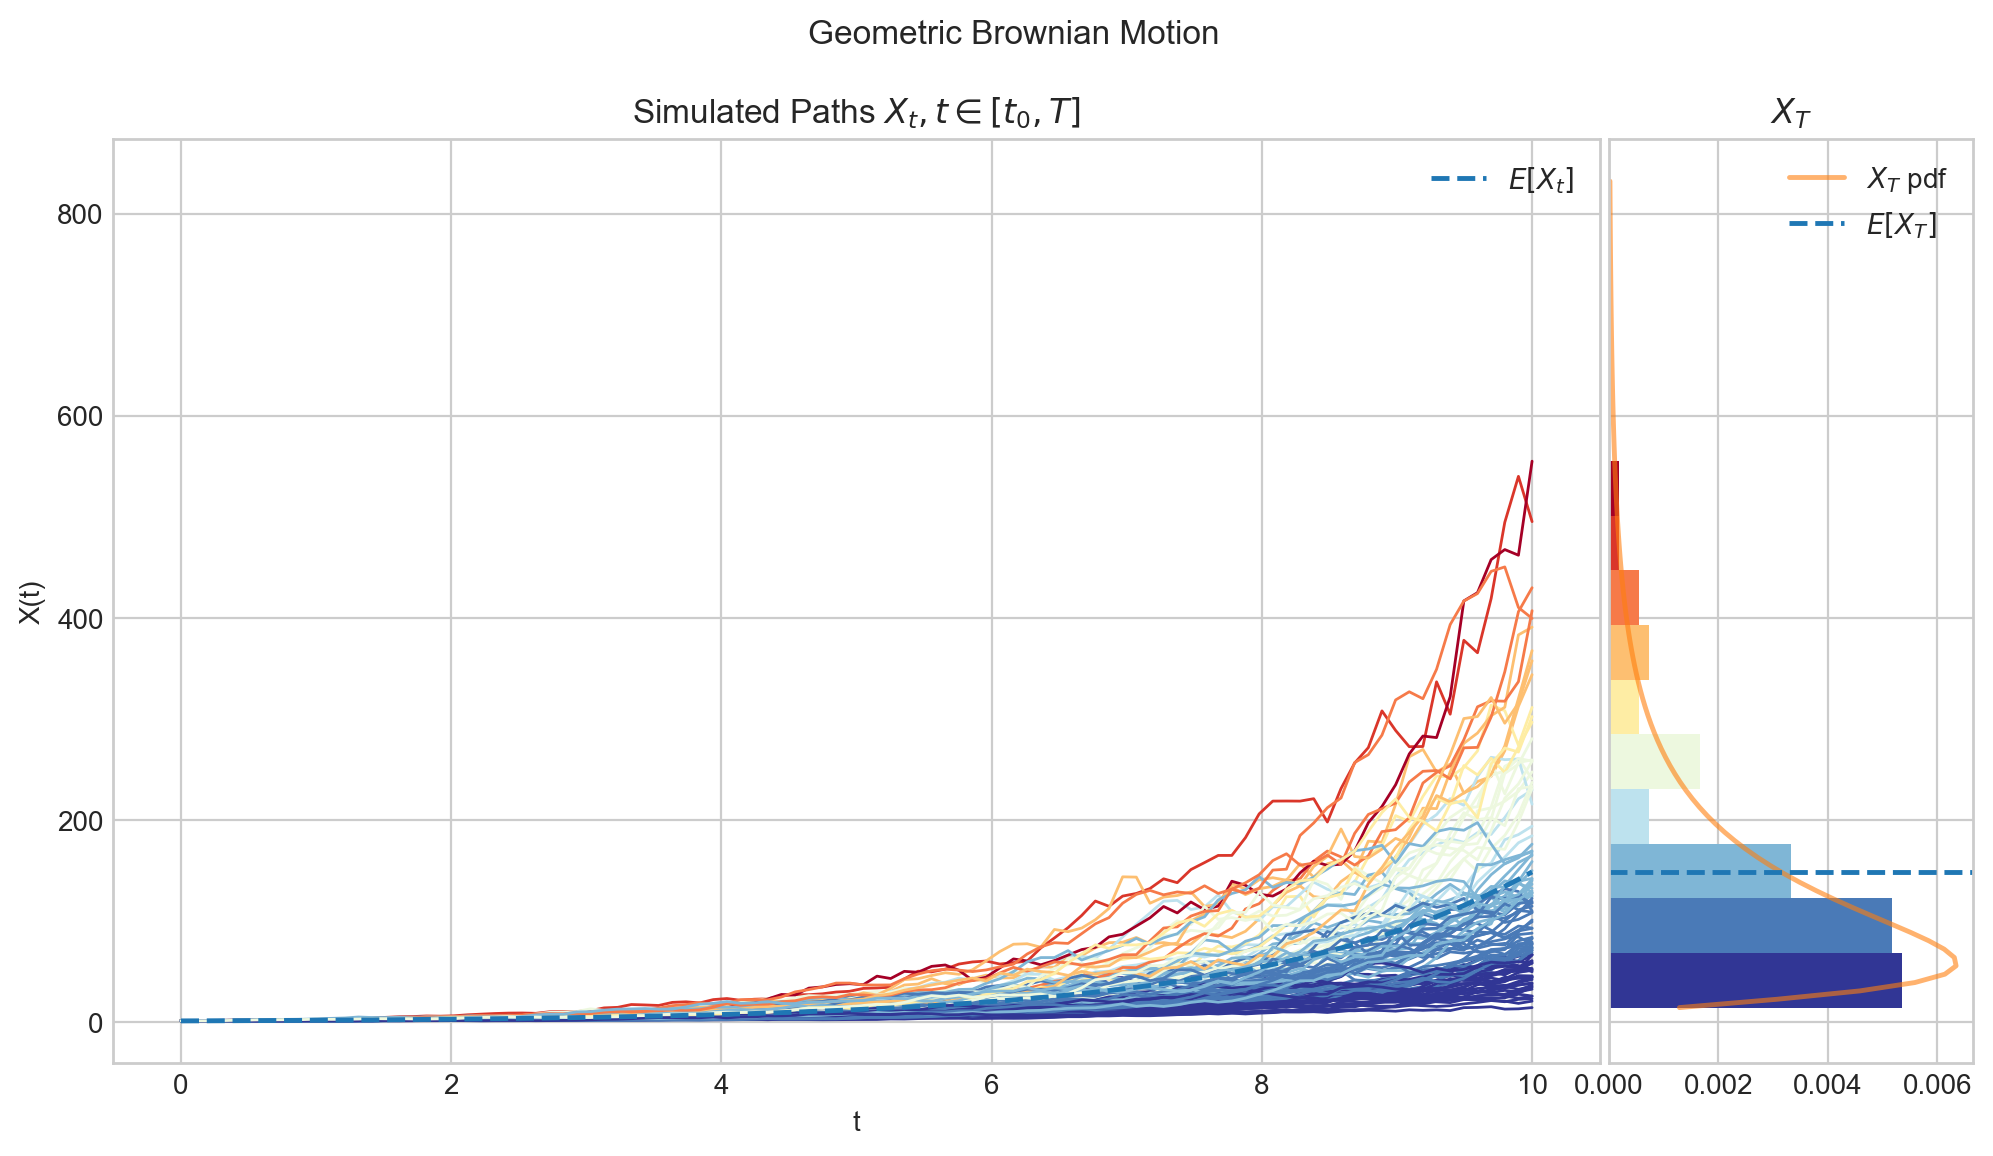

In [90]:
process = GBM(drift=0.5, volatility=0.25, initial=1.0, T=10.0)
process.draw(n=100, N=100)
plt.show()

#### Case 2

If $ \mu<\frac{1}{2}\sigma^2$, then $X_t\rightarrow 0$ in probability as $t\rightarrow\infty$. 

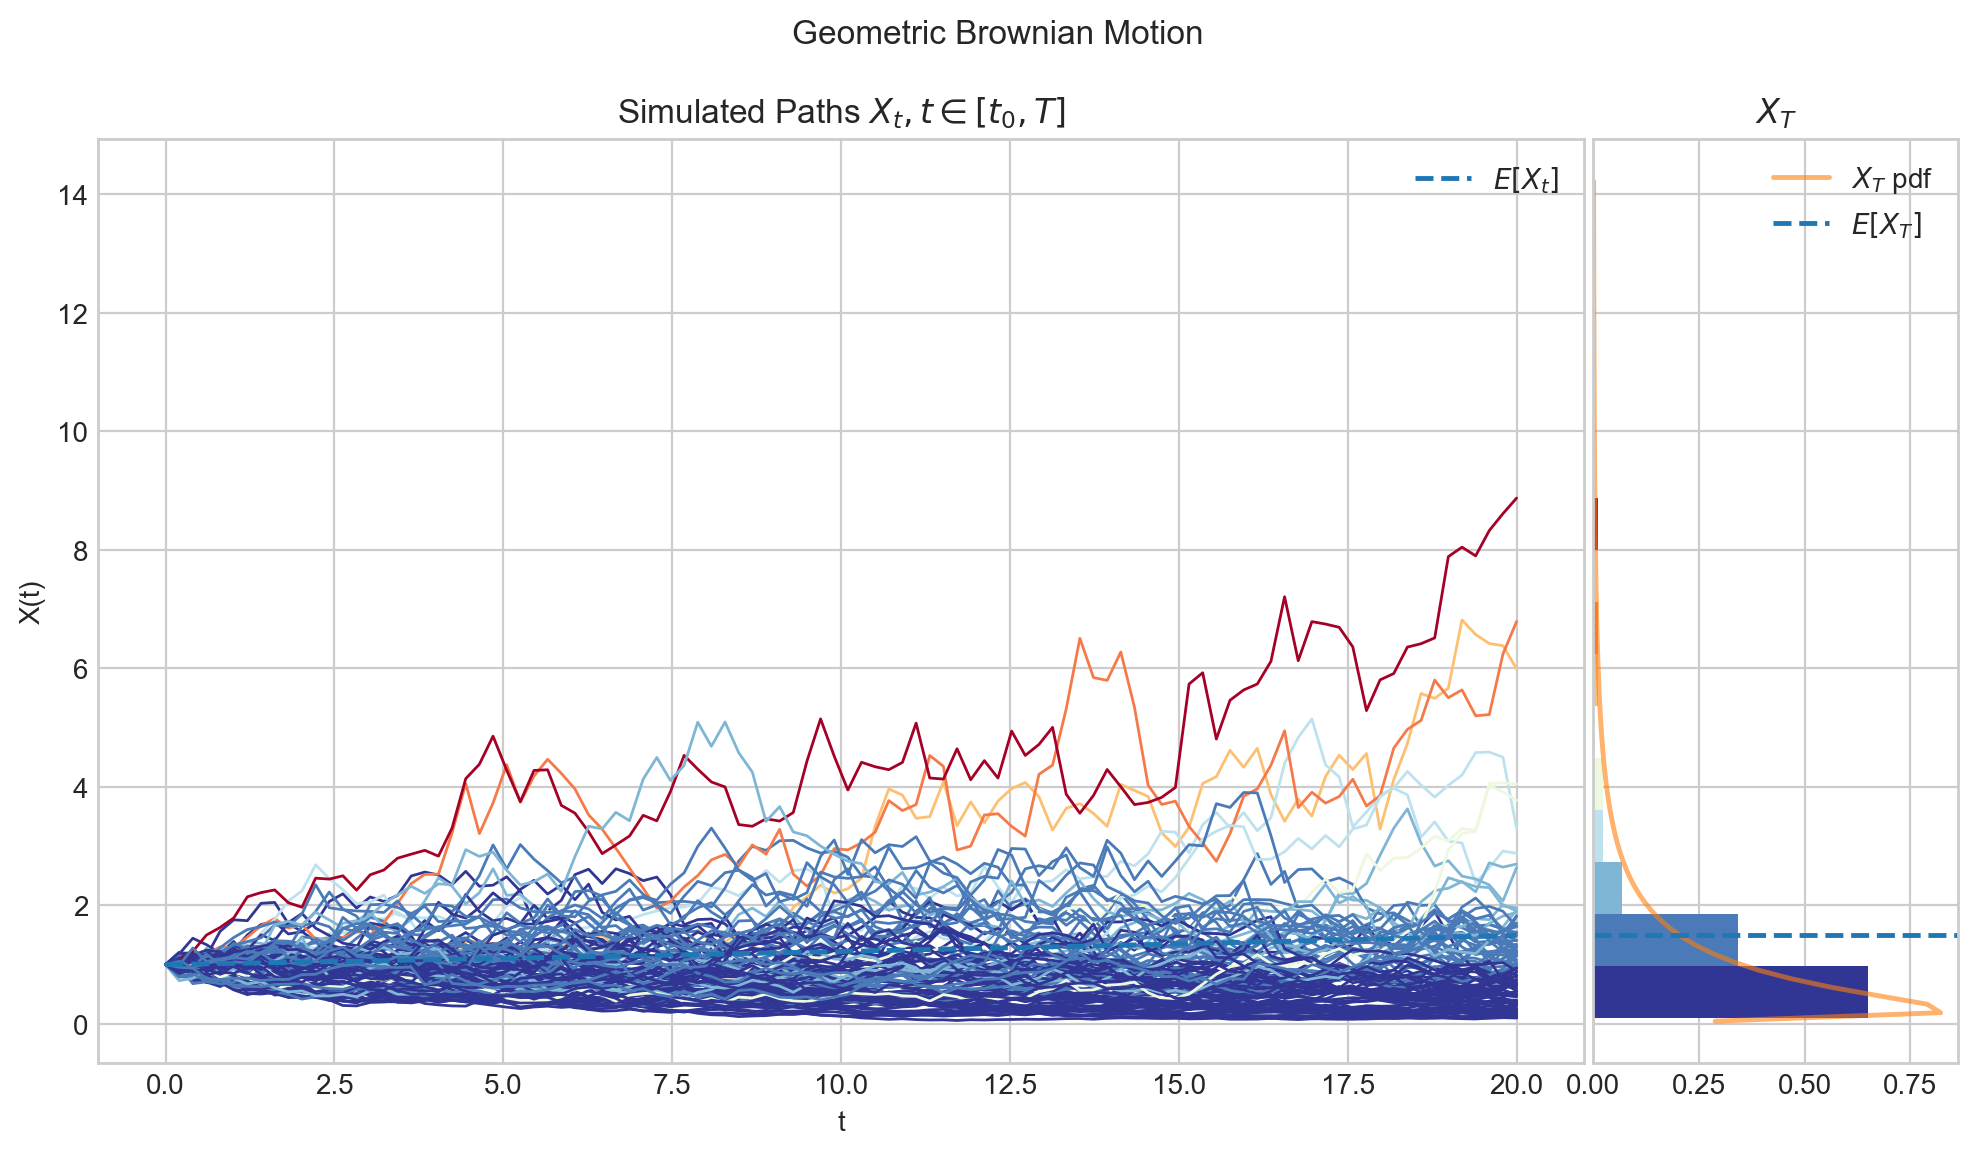

In [91]:
process = GBM(drift=0.02, volatility=0.25, initial=1.0, T=20.0)  # mu =(1/2)sigma**2
process.draw(n=100, N=100)
plt.show()


#### Case 3

If $ \mu = \frac{1}{2}\sigma^2$, then $X_t$ has no limit in probability as $t\rightarrow\infty$. 

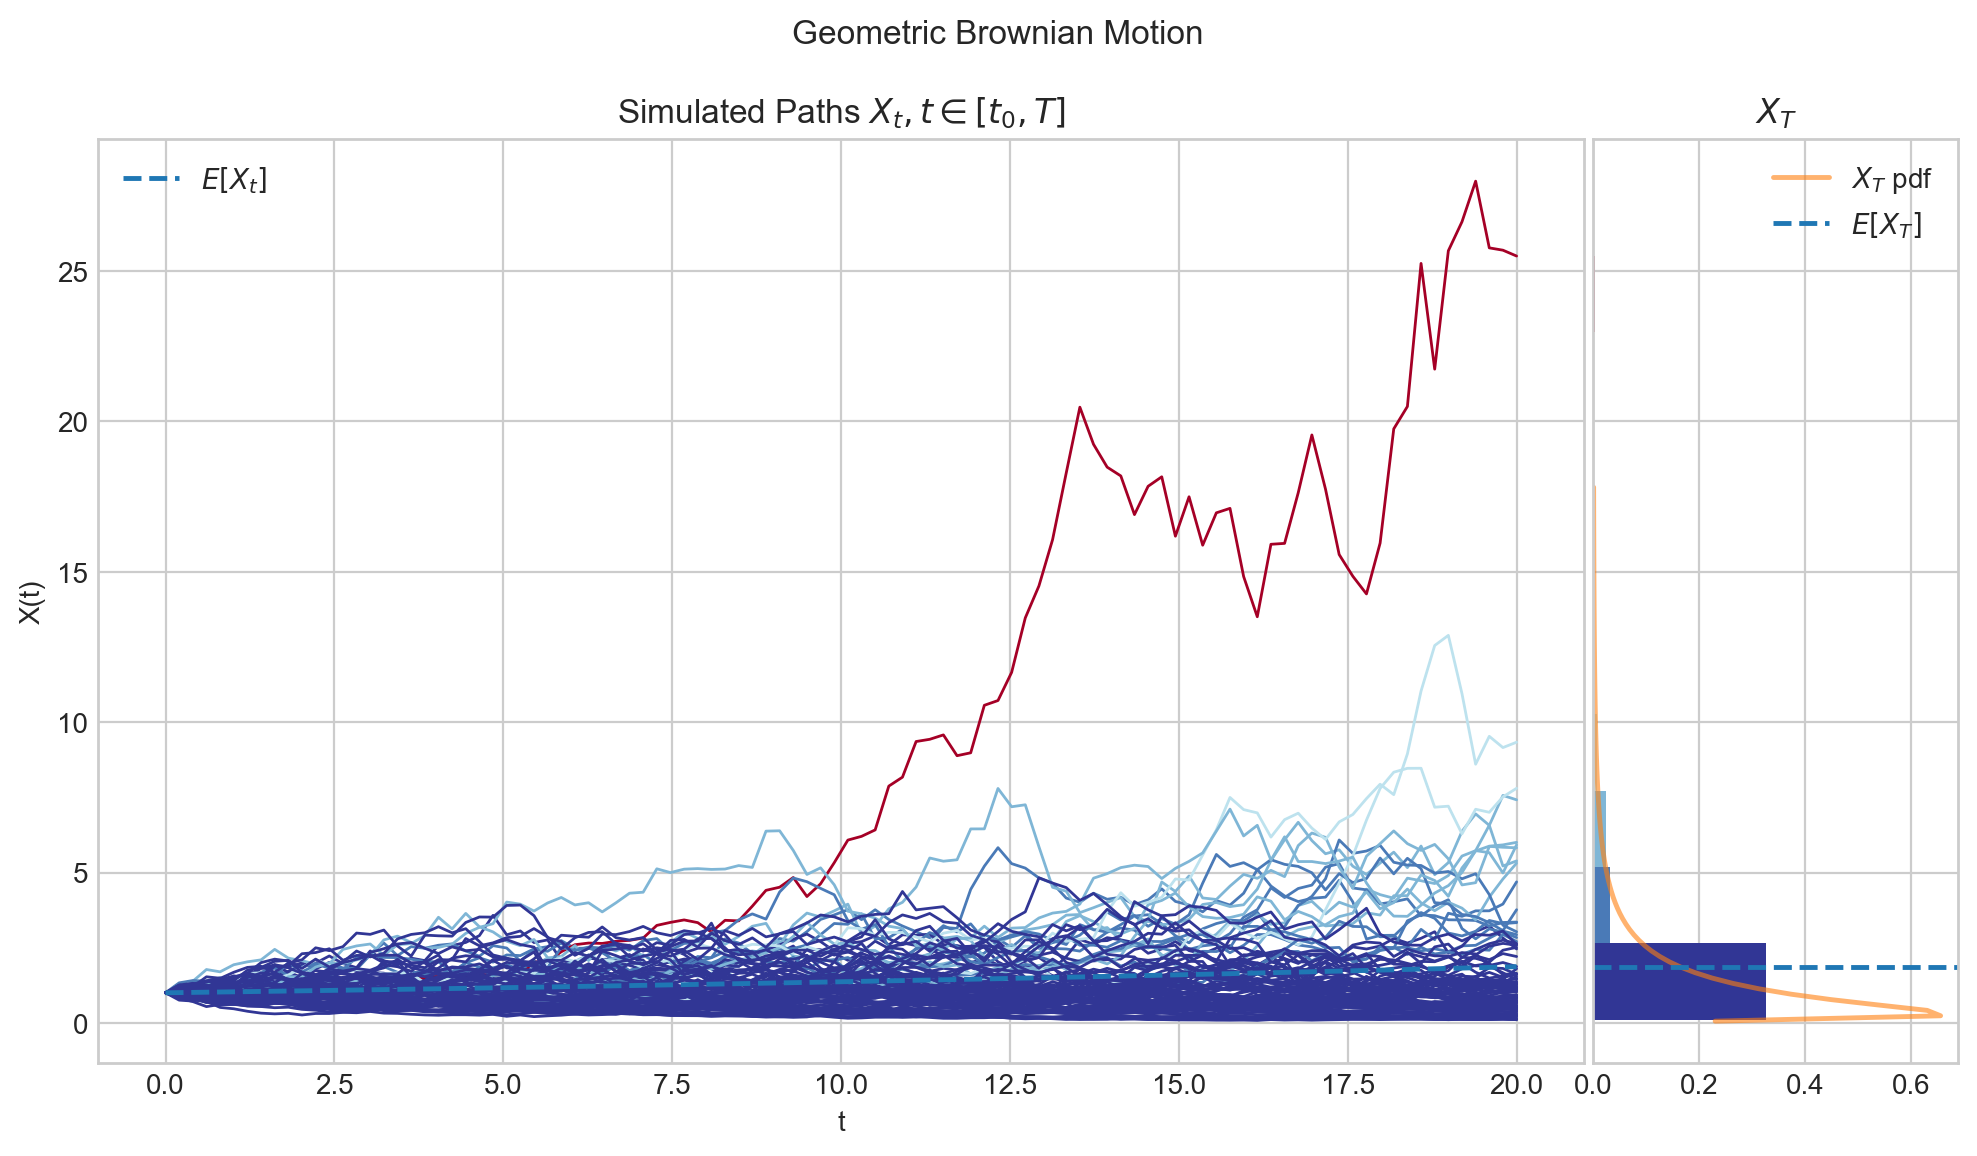

In [24]:
process = GBM(drift= 0.5*0.25**2 , volatility=0.25, initial=1.0, T=20.0)   # mu = (1/2)sigma**2
process.draw(n=100, N=100)
plt.show()


## Visualisation

To finish this note, let's take a final look at a simulation from the Geometric Brownian Motion.

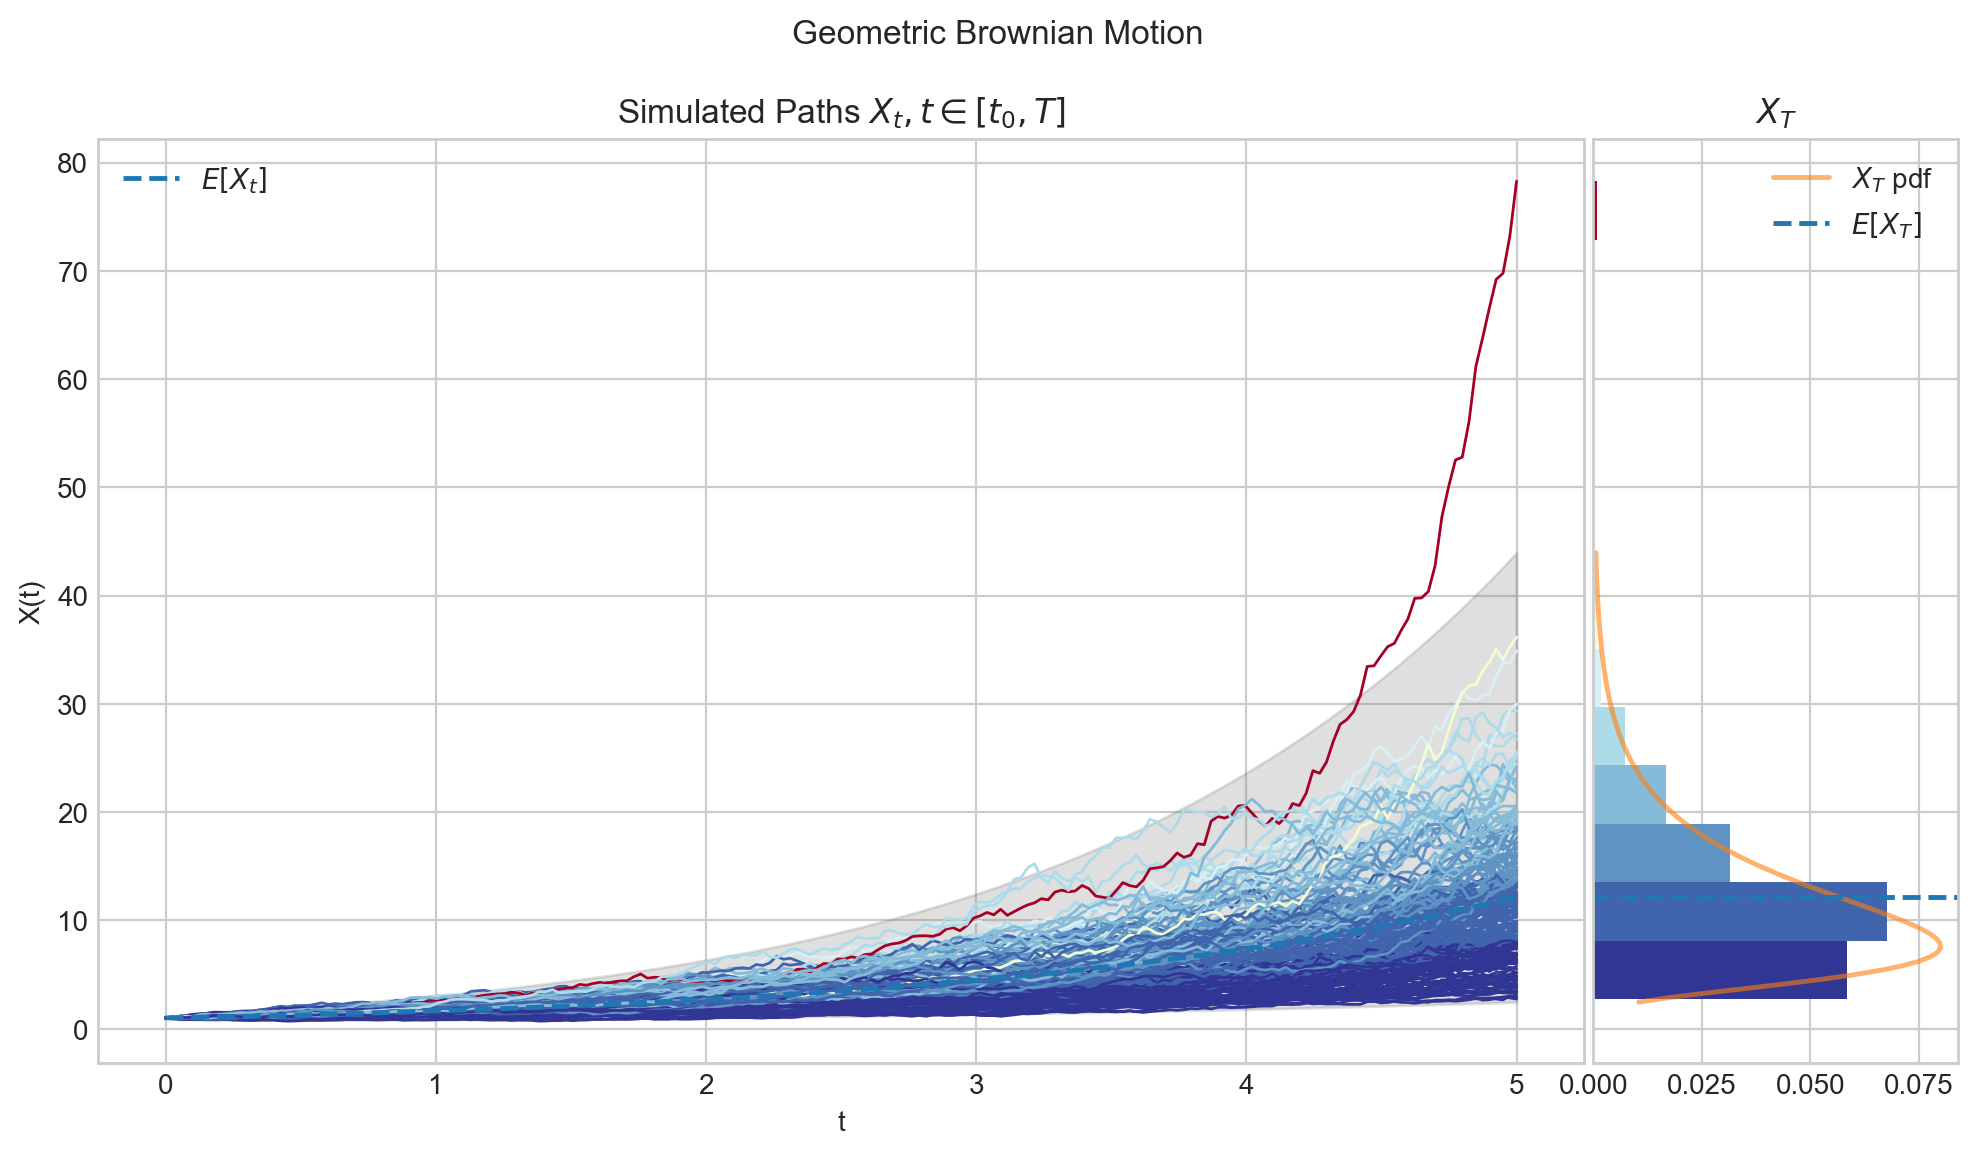

In [93]:
from aleatory.processes import GBM

process = GBM(drift=0.5, volatility=0.25, initial=1.0, T=5.0)
process.draw(n=200, N=200, envelope=True)
plt.show()

## References and Further Reading
- [Wiki - Lognormal distribution](https://en.wikipedia.org/wiki/Log-normal_distribution)
- [The Pricing of Options and Corporate Liabilities (1973)](https://www.cs.princeton.edu/courses/archive/fall09/cos323/papers/black_scholes73.pdf) by Fischer Black and Myron Scholes.